# Proposed Code of Loan Default Prediction

In [30]:
# For managing intricate data science operations, this command obtains and incorporates specialist third-party packages that include strong algorithms, optimization tools, sampling techniques, and effective gradient-based approaches.
!pip install catboost optuna imblearn lightgbm --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.2 MB/s eta 0:00:00


In [31]:
# Offers a framework for managing numerical data structures with several dimensions and carrying out quick arithmetic operations on them.
import numpy as nmpy
# Provides an adaptable framework for tabular data management, facilitating effective data transformation, cleaning, and analysis.
import pandas as pnds
# Facilitates the production of lucid and comprehensive graphical outputs, facilitating the investigation and dissemination of data insights.
import matplotlib.pyplot as mtplt
# Provides cutting-edge visualization tools that improve the reading and comprehension of intricate informational patterns.
import seaborn as sbrn
# In order to maintain cleaner and more focused outputs, it introduces utilities that enable the silence of non-critical runtime alarms.
import warnings
warnings.filterwarnings('ignore')
# Provides access to a large number of functions, constants, and numerical operations for scientific and analytical uses.
import math
# Makes it easier to separate datasets into separate groups so that predictive models can be fairly evaluated.
from sklearn.model_selection import train_test_split
# Presents a balancing strategy to enhance learning on uneven categories by creating synthetic minority examples.
from imblearn.over_sampling import ADASYN
# Provides techniques for efficiently identifying and preserving the most instructive features for model development.
from sklearn.feature_selection import RFECV, SelectFromModel
# Incorporates a statistical method for predictive analysis that establishes linear boundaries across categories.
from sklearn.linear_model import LogisticRegression
# Offers a sophisticated boosting method developed for practical applications that require speed, accuracy, and adaptability.
from catboost import CatBoostClassifier
# Offers strong ensemble techniques that integrate several weak learners to create more powerful and precise decision-making systems.
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
# Presents a highly optimized boosting system that is renowned for its effectiveness and scalability in big datasets.
import lightgbm as lgb
# Gives the process a wide range of tools to gauge the correctness, dependability, and caliber of classification results.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
# Provides probability distributions that are used in optimization experiments to define arbitrary search spaces.
from scipy.stats import randint, uniform
# Uses a cutting-edge optimization platform that cleverly investigates parameter setups to improve model performance.
import optuna

In [5]:
# Provides smooth access to documents saved in an external account by integrating persistent file storage with the cloud-based workspace.
from google.colab import drive
# Creates a connection between a specified directory and the current workspace, allowing resources to be read and written.
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Organizes an organized set of financial records into a flexible format that facilitates effective manipulation, investigation, and analysis within the present workspace after retrieving it from external storage.
loan_file = pnds.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/loan_data.csv')

In [7]:
# Shows the loaded dataset's first few items, providing a brief overview of its properties, structure, and sample values for first comprehension.
loan_file.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
# Provides the total number of records and the count of descriptive attributes to provide the dataset's overall size.
loan_file.shape

(45000, 14)

In [9]:
# Provides a summary of the descriptive fields that are available for analysis by listing all of the attribute names that are present in the dataset.
loan_file.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [10]:
# Gives a succinct overview of the dataset, with information about each field's data type, record count, attribute names, and non-missing entries.
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [11]:
# Provides statistical insights for numerical attributes, like distribution ranges, averages, and deviations, to aid in comprehending the quantitative features of the dataset.
loan_file.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [12]:
# Determines the total number of missing values for every characteristic, assisting in locating dataset gaps that might need to be cleaned up or imputationed.
loan_file.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Correlation Heatmap of Numerical Features

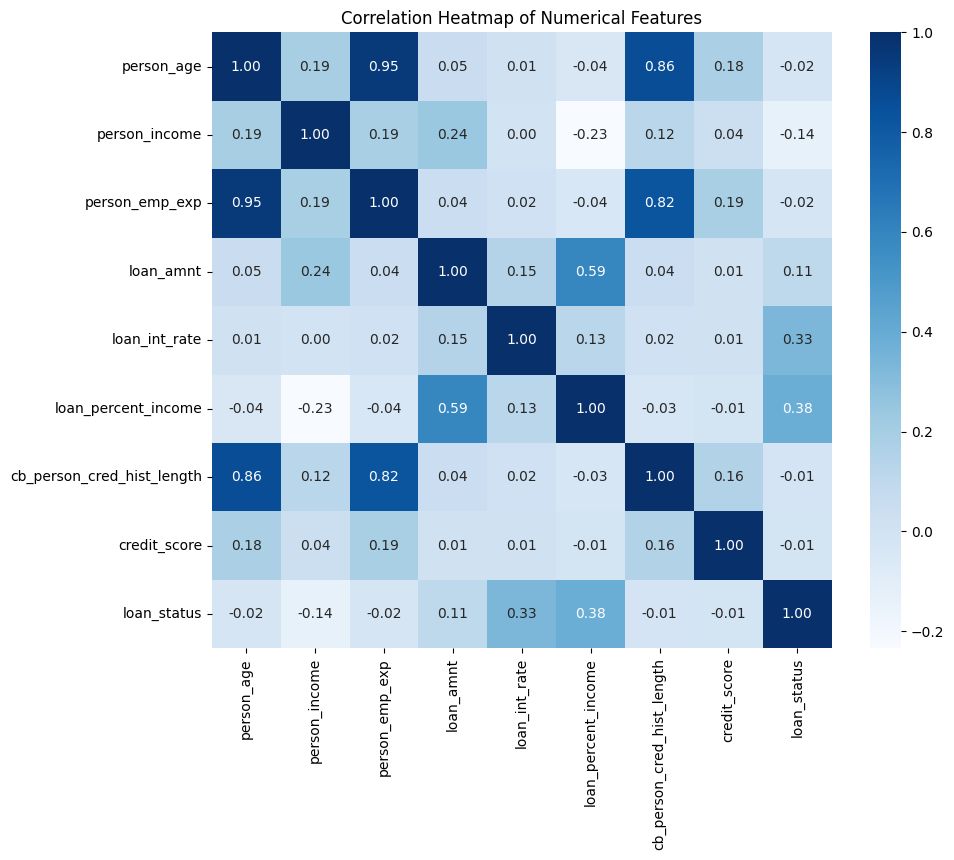

In [13]:
# Selects only those attributes from the wider set of accessible fields that store continuous or discrete quantities.
numerical_cols = loan_file.select_dtypes(include=nmpy.number).columns
# Determines pairwise statistical correlations between the selected quantitative attributes to uncover linear interdependence patterns.
correlation_matrix = loan_file[numerical_cols].corr()
# To guarantee readability and clarity of the next graphic depiction, a plotting surface is initialized with specified width and height.
mtplt.figure(figsize=(10, 8))
# Generates a visual representation that resembles a grid, with cell colors and annotations showing the strength and direction of associations between numerical elements.
sbrn.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
# Provides the user with relevant context by placing a descriptive header above the visualization.
mtplt.title('Correlation Heatmap of Numerical Features')
# Shows the prepared figure in the workspace, allowing for interpretation of the analysis.
mtplt.show()

Distribution of target feature

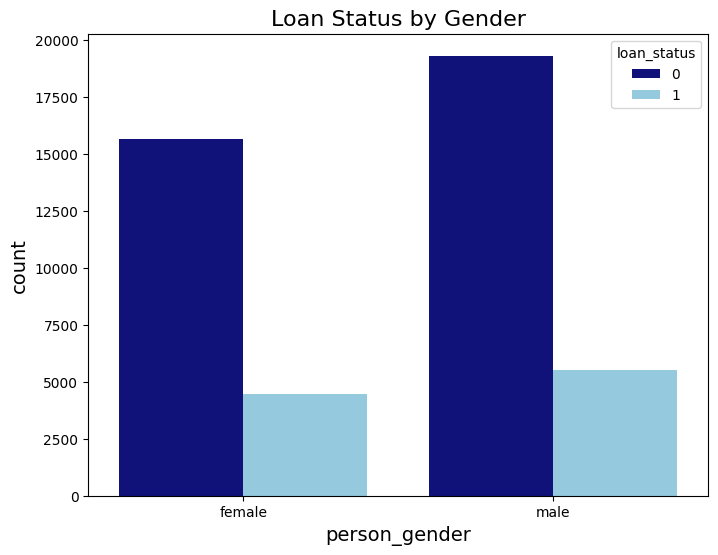

In [14]:
# To preserve visual harmony and guarantee that the upcoming graphic is presented clearly, a new plotting surface with specified proportions is opened.
mtplt.figure(figsize=(8, 6))
# Constructs a categorical comparison display in which outcome labels use contrasting hues to further segregate group sizes, which are visually differentiated by bar heights.
sbrn.countplot(data=loan_file, x='person_gender', hue='loan_status', palette={0: "Darkblue", 1: "skyblue"})

# Puts a clear header above the figure to explain the relationship being highlighted and help with interpretation.
mtplt.title('Loan Status by Gender', fontsize=16)
# Indicates the category being grouped by placing an instructive label with larger text for reading beneath the chart's horizontal dimension.
mtplt.xlabel('person_gender', fontsize=14)
# Styles the chart with a larger text size for clarity and adds an explanatory caption to the vertical dimension that shows the measured frequencies.
mtplt.ylabel('count', fontsize=14)
# Shows the finished visual output in the surroundings for direct examination and interpretation.
mtplt.show()

Barplot for Loan Intent vs Default Status

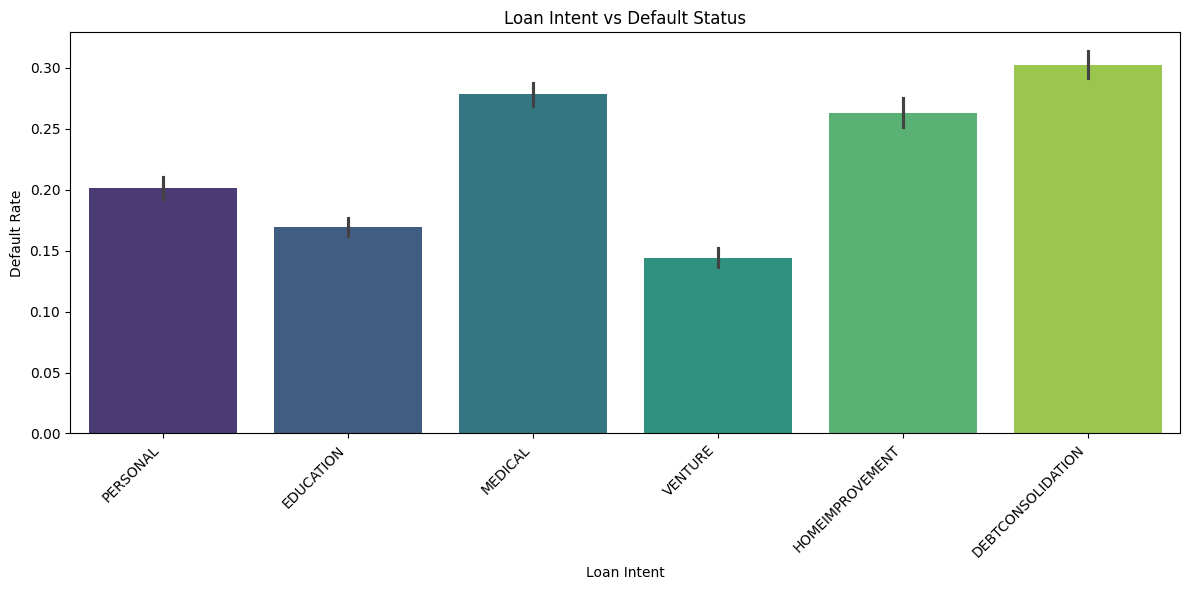

In [15]:
# To guarantee sufficient room for displaying several categories side by side, a new drawing canvas with an extended width and a reasonable height is opened.
mtplt.figure(figsize=(12, 6))
# Creates a bar-style chart with a color scheme that improves visual distinction to compare average outcome values across various borrowing objectives.
sbrn.barplot(data=loan_file, x='loan_intent', y='loan_status', palette='viridis')
# In order to convey the relationship under analysis between purpose and repayment behavior, a descriptive heading is added above the graphic.
mtplt.title('Loan Intent vs Default Status')
# Gives each bar context by labeling the horizontal axis with the category name that represents different borrowing objectives.
mtplt.xlabel('Loan Intent')
# To make the meaning of the bar heights more clear, label the vertical axis with the appropriate outcome metric.
mtplt.ylabel('Default Rate')
# Properly aligns and rotates the labels of the horizontal categories to make them easier to read.
mtplt.xticks(rotation=45, ha='right')
# Modifies the figure's spacing to guarantee that titles, labels, and visuals all fit properly and don't overlap.
mtplt.tight_layout()
# Completely renders the visualization so that it can be viewed and interpreted in the workplace.
mtplt.show()

Barplot for Home ownership vs Default Status

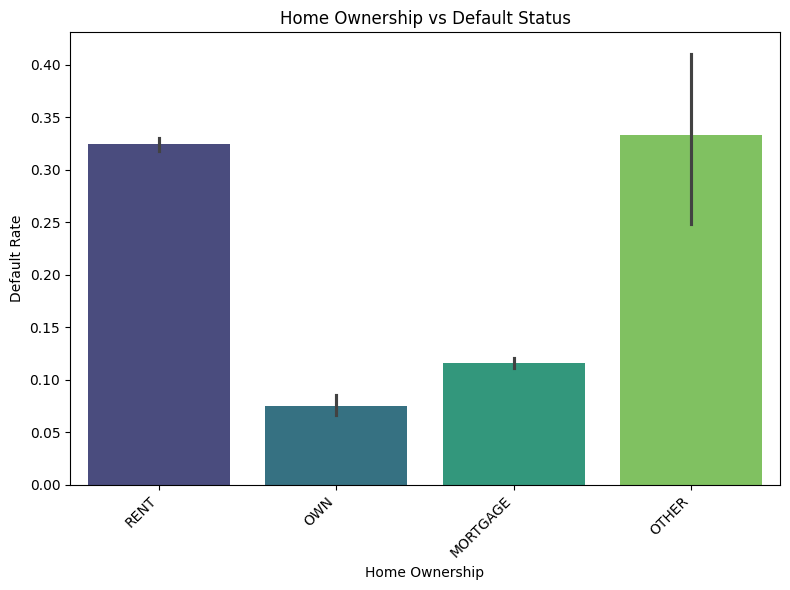

In [16]:
# Creates a new visual workspace with precise measurements to guarantee the future depiction is balanced and clear.
mtplt.figure(figsize=(8, 6))
# Uses a visually appealing color scheme to create a comparative bar-style chart that shows the average repayment outcome across various home ownership categories.
sbrn.barplot(data=loan_file, x='person_home_ownership', y='loan_status', palette='viridis')
# Includes a clear heading at the top of the figure that explains the connection between repayment behavior and living arrangement.
mtplt.title('Home Ownership vs Default Status')
# To improve interpretability, label the horizontal axis with the category descriptor that denotes the various kinds of living arrangements.
mtplt.xlabel('Home Ownership')
# Indicates what the height of every line indicates by labeling the vertical axis with the outcome measure.
mtplt.ylabel('Default Rate')
# To enhance reading and avoid overlap, the horizontal category names are rotated at an angle and their alignment is changed.
mtplt.xticks(rotation=45, ha='right')
# Makes the layout as efficient as possible so that labels and titles, among other things, fit nicely inside the figure without being cut off.
mtplt.tight_layout()
# Provides the completed chart for analysis and interpretation by displaying it in the workspace.
mtplt.show()

Voilin Plot

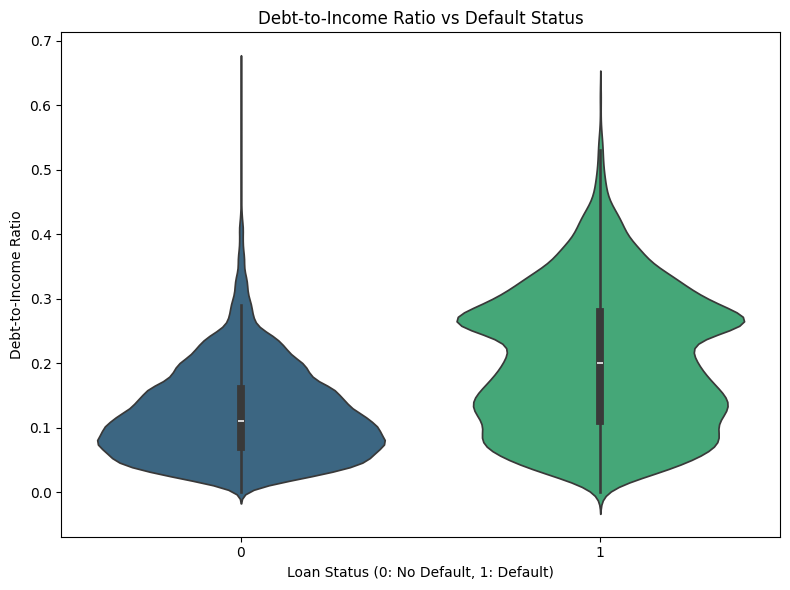

In [17]:
# Creates a new drawing area with specified dimensions to guarantee that the distribution plot is shown appropriately and clearly.
mtplt.figure(figsize=(8, 6))
# Develops a distribution-based representation that illustrates how income obligations change depending on repayment outcomes by combining density arcs and graphical components.
sbrn.violinplot(data=loan_file, x='loan_status', y='loan_percent_income', palette='viridis')
# Overlays the visual with a descriptive header that explains the relationship between income burden and repayment behavior under investigation.
mtplt.title('Debt-to-Income Ratio vs Default Status')
# Indicates which categorical result classes are being compared by labeling the horizontal dimension with additional interpretation-related information.
mtplt.xlabel('Loan Status (0: No Default, 1: Default)')
# Indicates the financial ratio being examined and depicted in the plotted distribution by labeling the vertical dimension.
mtplt.ylabel('Debt-to-Income Ratio')
# Modifies the figure's spacing to ensure that titles, axes, and text are all perfectly aligned and do not overlap.
mtplt.tight_layout()
# Displays the completed figure on the screen so that the visual analysis may be interpreted.
mtplt.show()

Detecting Outliers using Boxplots

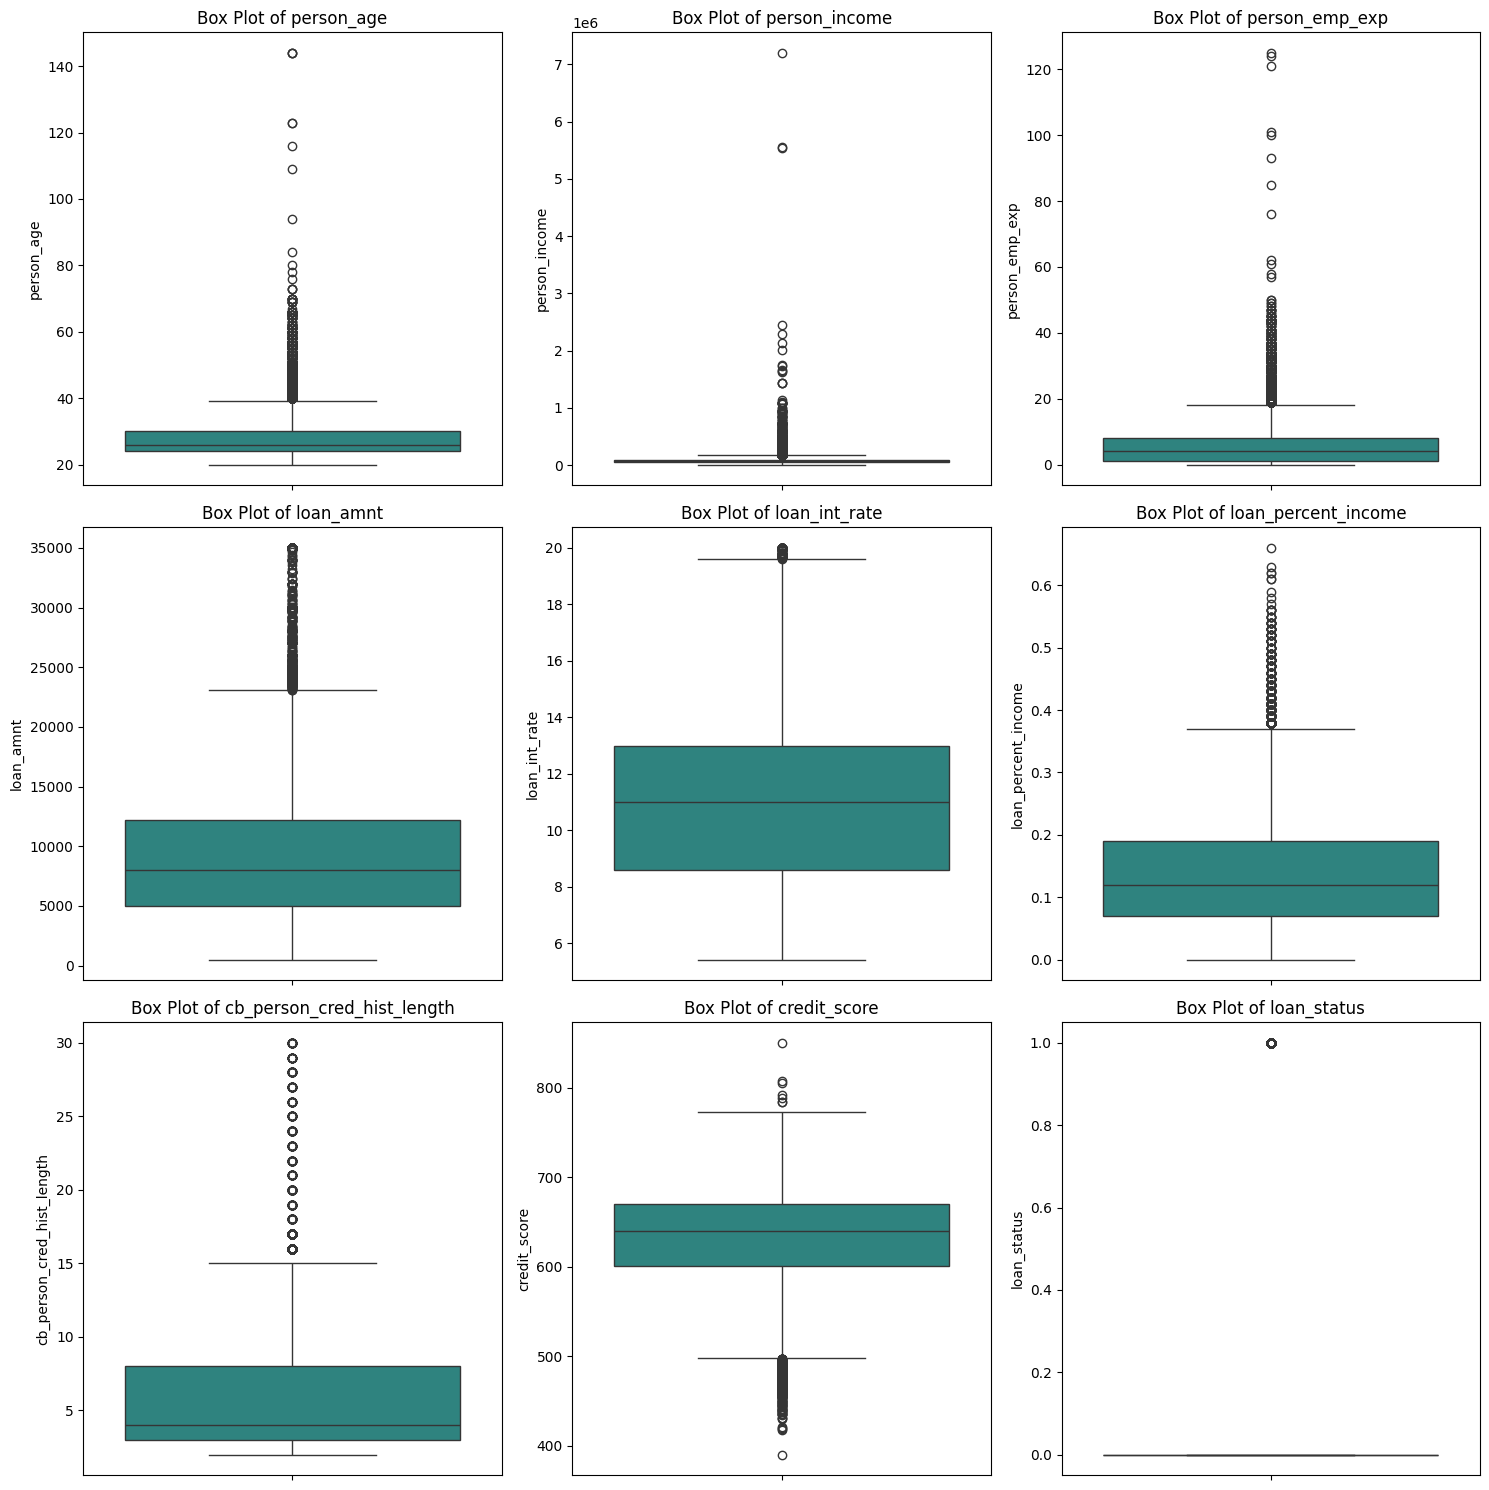

In [18]:
# Extracts all fields containing quantitative data so that visual summaries can be used for individual analysis.
numerical_cols = loan_file.select_dtypes(include='number').columns

# Establishes the number of rows and columns needed in the grid to properly arrange several visual summaries.
n_cols = 3  # number of plots per row (adjust as needed)
n_rows = math.ceil(len(numerical_cols) / n_cols)
# Constructs a well-organized arrangement with several slots to accommodate a number of separate visualizations side by side.
fig, axes = mtplt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

# To make looping across the grid of axes easier, it transforms it into a one-dimensional sequence.
axes = axes.flatten()
# Creates a box-style graphic after iterating over each quantitative attribute to show its spread and identify anomalous values.
for i, col in enumerate(numerical_cols):
    sbrn.boxplot(data=loan_file, y=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Clears the grid of any empty spaces to maintain a neat and polished final presentation.
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Makes tags, titles, and plots fit cleanly without overlapping by optimizing spacing.
mtplt.tight_layout()
# Makes the analysis interpretable by displaying the entire collection of visual summaries.
mtplt.show()

Handling outliers using Capping method

In [19]:
# Indicates a group of quantitative fields that need to be adjusted because they might have significant departures from typical trends.
numerical_cols_with_outliers = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
# Iterates over each chosen attribute to find and address significant distributional discrepancies.
for col in numerical_cols_with_outliers:
# Gets the current attribute's statistical cutoff, which is the lower quarter of the distribution.
    Q1 = loan_file[col].quantile(0.25)
    # Gets the current attribute's statistical cutoff, which is the upper quadrant of the distribution.
    Q3 = loan_file[col].quantile(0.75)
    # Determines the difference between the top and bottom quarters, which is used as a standard to spot irregularities.
    IQR = Q3 - Q1
    # Defines the upper limit that can be reached before values are deemed excessive and modified.
    upper_bound = Q3 + 1.5 * IQR
    # Defines the lowest acceptable level below which values will be deemed excessive and modified.
    lower_bound = Q1 - 1.5 * IQR
    # To avoid distortion from high extremes, it caps all observations that exceed the upper limit that is allowed.
    loan_file[col] = nmpy.where(loan_file[col] > upper_bound, upper_bound, loan_file[col])
    # To avoid distortion from low extremes, any observations that fall below the minimum allowable level are capped.
    loan_file[col] = nmpy.where(loan_file[col] < lower_bound, lower_bound, loan_file[col])
# Produces a confirmation statement that the interquartile-based capping technique has been used to control anomalies.
print("Outliers handled using capping (IQR method).")

Outliers handled using capping (IQR method).


Show boxplots after handling outliers

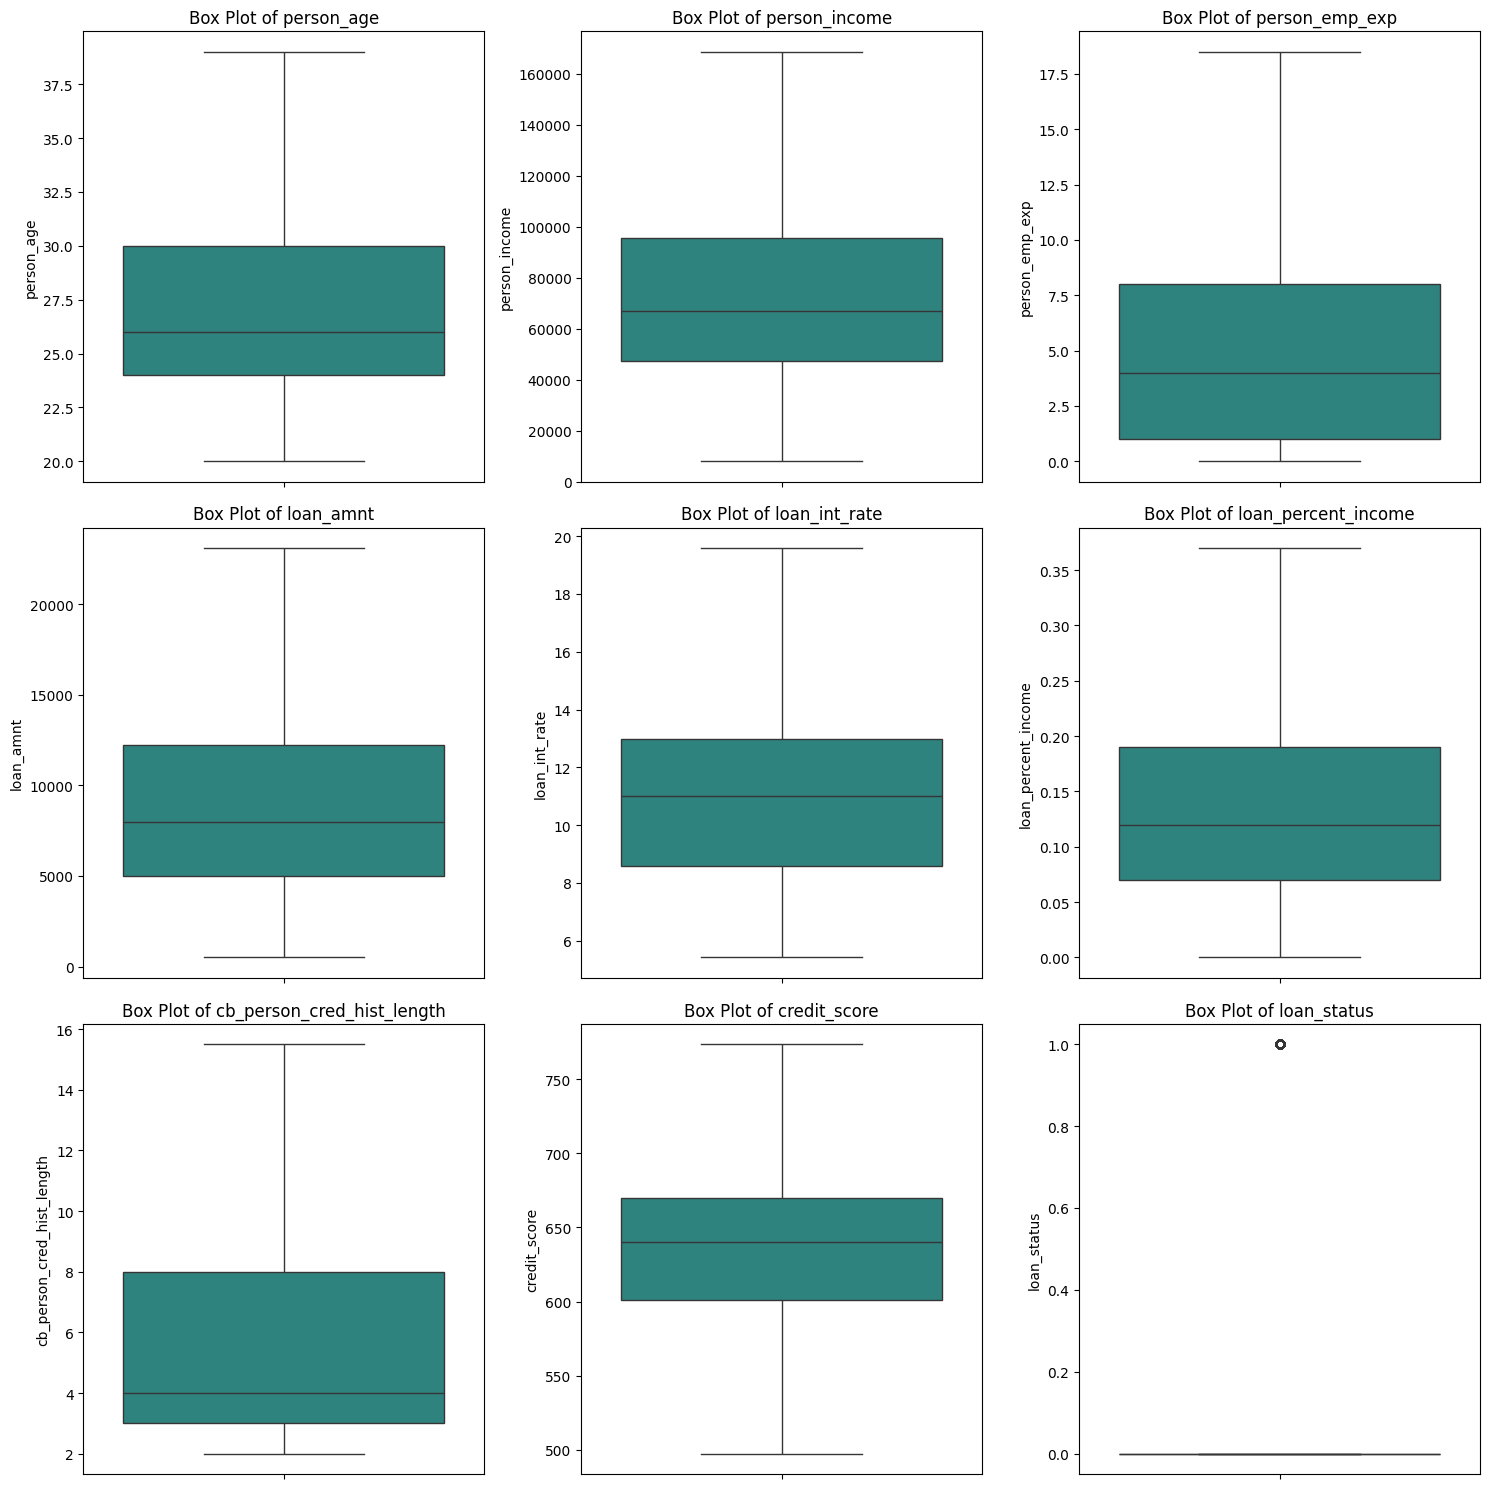

In [20]:
# Gathers all characteristics that correspond to quantifiable amounts so that each one can be evaluated separately for anomalies and distribution patterns.
numerical_cols = loan_file.select_dtypes(include=nmpy.number).columns
# Calculates the number of rows needed to display all visuals in a structured arrangement, taking into account the number of horizontal slots per row.
n_cols = 3  # number of plots per row (adjust as needed)
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Constructs an organized grid of displays with several sections of the right size to accommodate a series of visual summaries.
fig, axes = mtplt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

# Makes it easier to efficiently loop through several compartments by converting the grid structure into a single list.
axes = axes.flatten()
# Each measurable attribute is iterated over, producing a concise summary chart that emphasizes variances, central tendency, and spread.
for i, col in enumerate(numerical_cols):
    sbrn.boxplot(data=loan_file, y=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Eliminates unnecessary sections from the arrangement to keep a neat and polished display free of empty slots.
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Modifies internal space to ensure readability and clarity by avoiding title, label, and chart overlap.
mtplt.tight_layout()
# Makes the completed set of distribution summaries available for analysis and interpretation.
mtplt.show()

Scatter plot to show Loan amount vs Applicant income by Loan status

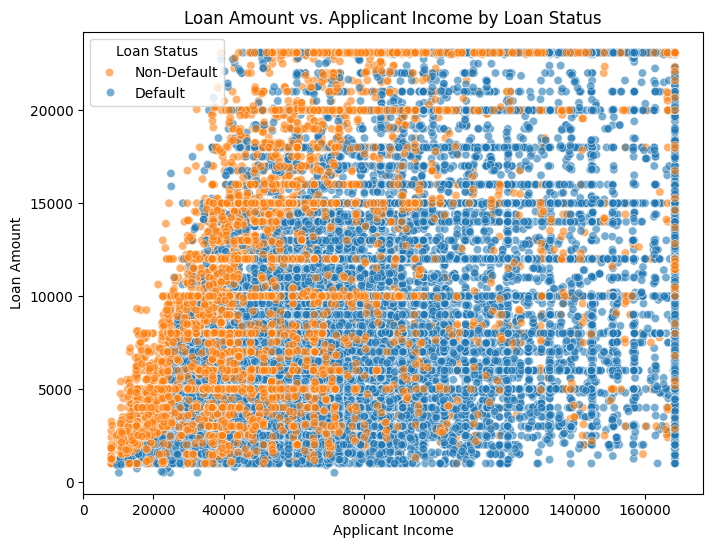

In [21]:
# Opens a fresh canvas with predetermined dimensions to give a balanced area for showing how two quantifiable attributes relate to one another.
mtplt.figure(figsize=(8,6))
# Creates a point-based visualization in which each marker stands for an observation, arranged in relation to income and loan amount, and distinguishes results with clear transparency and different colors.
sbrn.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", data=loan_file, alpha=0.6)
# To make clear the kind of link being investigated between borrowing behavior and financial capacity, a descriptive heading is included at the top of the chart.
mtplt.title("Loan Amount vs. Applicant Income by Loan Status")
# Indicates the variable that represents the applicants' financial earnings by labeling the horizontal axis.
mtplt.xlabel("Applicant Income")
# Indicates the variable that represents the quantity of the borrowed money by labeling the vertical axis.
mtplt.ylabel("Loan Amount")
# In order to make comprehension easier, a legend is added to differentiate repayment outcomes and includes informative text labels.
mtplt.legend(title="Loan Status", labels=["Non-Default","Default"])
# Shows the finished figure, enabling study and explanation of the visualization.
mtplt.show()

Histogram of Credit scores by Loan Status

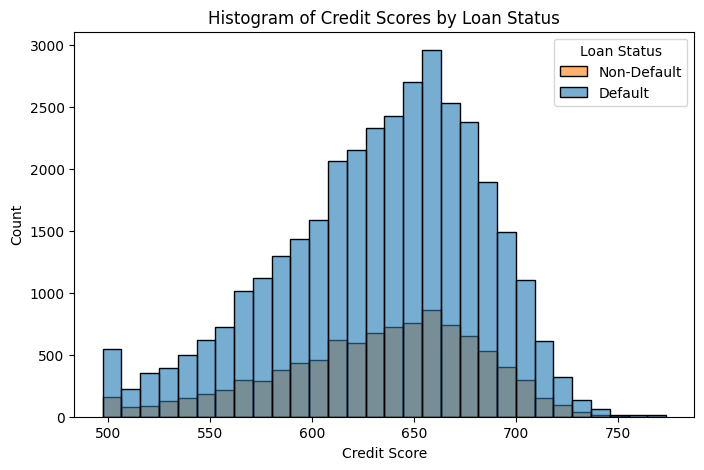

In [22]:
# To display the frequency distribution of a financial reliability measure in an organized manner, a new drawing surface with predetermined width and height is created.
mtplt.figure(figsize=(8,5))
# Uses colored separation and transparency to create a frequency-based representation that divides observations into intervals and illustrates how values are allocated between repayment outcomes.
sbrn.histplot(data=loan_file, x="credit_score", hue="loan_status", bins=30, kde=False, alpha=0.6)
# To clarify that the visualization displays the distribution of reliability scores across various repayment categories, a heading is added above the chart.
mtplt.title("Histogram of Credit Scores by Loan Status")
# Indicates the numerical scale that represents applicants' reliability score by labeling the horizontal axis.
mtplt.xlabel("Credit Score")
# Indicates how many people fall within each score range by labeling the vertical axis.
mtplt.ylabel("Count")
# Adds an explanation to make it clear which colors indicate a successful or unsuccessful payback, improving the grouped bars' readability.
mtplt.legend(title="Loan Status", labels=["Non-Default","Default"])
# Displays the entire histogram on the screen so that the comparative distribution may be assessed.
mtplt.show()

Label Encoding for encode categorical features

In [23]:
# This tool converts categorical descriptors into numerical representations that can be used in computational models.
from sklearn.preprocessing import LabelEncoder
# Identifies all properties that need to be converted into numerical form because they contain textual or symbolic information.
categorical_cols = loan_file.select_dtypes(include='object').columns
# Creates a storage structure to record the transformers applied to every symbolic attribute in case they need to be used again.
label_encoders = {}
# Iterates through each symbolic attribute, maps each unique entry into an integer using a converter, and then updates the dataset with the updated values.
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    loan_file[col] = label_encoders[col].fit_transform(loan_file[col])
# Produces a confirmation letter indicating the successful conversion of symbolic properties into their numerical equivalents.
print('After encoding categorical features')
# Displays the initial rows of the updated dataset, giving an overview of the numerical representation of the symbolic fields.
loan_file.head()

After encoding categorical features


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,3,23093.125,4,16.02,0.37,3.0,561.0,0,1
1,21.0,0,3,12282.0,0.0,2,1000.000,1,11.14,0.08,2.0,504.0,1,0
2,25.0,0,3,12438.0,3.0,0,5500.000,3,12.87,0.37,3.0,635.0,0,1
3,23.0,0,1,79753.0,0.0,3,23093.125,3,15.23,0.37,2.0,675.0,0,1
4,24.0,1,4,66135.0,1.0,3,23093.125,3,14.27,0.37,4.0,586.0,0,1


Feature Engineering

In [24]:
# Provides information about repayment capacity in relation to income by creating a new attribute that reflects the ratio of borrowed amount to financial earnings.
loan_file['debt_to_income_ratio'] = loan_file['loan_amnt'] / loan_file['person_income']
# In order to prevent division errors and capture maturity vs experience, zero values are replaced by another property that calculates the relationship between age and professional duration.
loan_file['age_to_experience_ratio'] = loan_file['person_age'] / loan_file['person_emp_exp'].replace(0,1)

Define X and y variable

In [25]:
# Removes the outcome column, leaving only the characteristics used for modeling, and divides the dataset into predictor variables.
X = loan_file.drop('loan_status', axis=1)
# Specifies the class to be forecasted during training as the outcome column, which defines the target variable.
y = loan_file['loan_status']

Stratified train test split

In [26]:
# Divides the dataset into training and testing sections, guaranteeing that twenty percent of the data is set aside for assessment, that the results can be replicated, and that the distribution of classes is balanced between the two subsets.
loan_X_train, loan_X_test, loan_y_train, loan_y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Balancing using RandomOverSampler

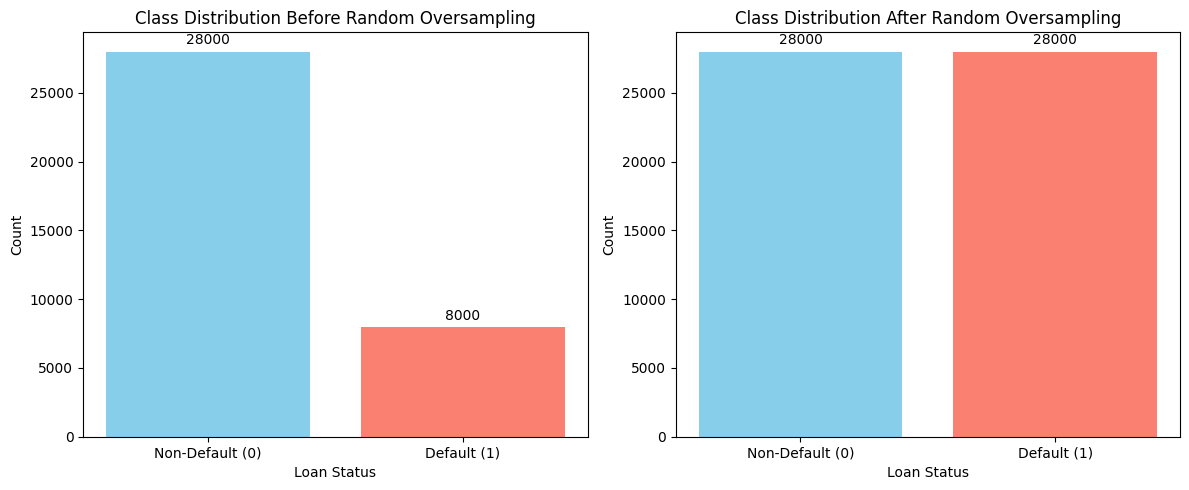

In [27]:
# Uses a specific method from a library to replicate samples of the less frequent group in order to assist rebalance unbalanced outcome categories.
from imblearn.over_sampling import RandomOverSampler

# Before balancing, the number of samples in each outcome category is counted to identify any unequal distribution.
class_counts_before_ros = loan_y_train.value_counts()
# Starts the process of replicating minority samples until the outcome categories are balanced.
ros = RandomOverSampler(random_state=42)
# Creates a new dataset with equal representation of categories by using the balancing approach on the training set.
loan_X_train_resampled_ros, loan_y_train_resampled_ros = ros.fit_resample(loan_X_train, loan_y_train)

# Verifies equal representation by counting the number of samples in each outcome category after balancing.
class_counts_after_ros = loan_y_train_resampled_ros.value_counts()

# Produces a figure layout that compares the distribution of categories before and after balancing.
fig, axes = mtplt.subplots(1, 2, figsize=(12, 5))

# Before balancing, bars are drawn to show category distribution, with different hues denoting the two classes.
bars_before = axes[0].bar(class_counts_before_ros.index, class_counts_before_ros.values, color=['skyblue', 'salmon'])
# To make it clear that the first graphic displays the distribution state before balancing, a descriptive heading is added above it.
axes[0].set_title('Class Distribution Before Random Oversampling')
# Indicates the category that represents the outcome classes by labeling the first chart's horizontal axis.
axes[0].set_xlabel('Loan Status')
# Indicates the number of occurrences for each result category by labeling the first chart's vertical axis.
axes[0].set_ylabel('Count')
# Indicates the locations of the two categories in the first chart along the horizontal axis.
axes[0].set_xticks(class_counts_before_ros.index)
# To clearly identify the class meaning, add text labels beneath each category in the first chart.
axes[0].set_xticklabels(['Non-Default (0)', 'Default (1)'])
# To display the precise counts for each class, numerical labels are placed over the bars in the first chart.
axes[0].bar_label(bars_before, labels=class_counts_before_ros.values, padding=3)

# After using synthetic replication, it creates a second panel of vertical graphical shapes that show the modified balance between categories.
bars_after = axes[1].bar(class_counts_after_ros.index, class_counts_after_ros.values, color=['skyblue', 'salmon'])
# Above the second panel, an explanation headline is added to help the viewer grasp that the image emphasizes proportions after balancing
axes[1].set_title('Class Distribution After Random Oversampling')
# In order to make clear what the two divisions in the comparison represent, descriptive text is positioned beneath the horizontal axis.
axes[1].set_xlabel('Loan Status')
# Specifies that the measurement corresponds to the number of people who fall into each division by adding descriptive text along the upright axis.
axes[1].set_ylabel('Count')
# Verifies that the locations of the plotted divisions precisely match the category markers on the bottom axis.
axes[1].set_xticks(class_counts_after_ros.index)
# To make the picture easier to understand at first look, it substitutes easily readable category names for raw number markers.
axes[1].set_xticklabels(['Non-Default (0)', 'Default (1)'])
# Adds numerical annotations to each vertical block so that the viewer can read precise values right away without having to make any guesses based on the axis.
axes[1].bar_label(bars_after, labels=class_counts_after_ros.values, padding=3)
# Automatically modifies spacing to keep everything neat and readable and prevent titles, labels, or forms from overlapping.
mtplt.tight_layout()
# Shows the finished visual output on the screen for the user to examine and interpret.
mtplt.show()

Feature Selection techniques

In [28]:
# Establishes a baseline for prediction by applying a basic mathematical model with a constraint that encourages some coefficients to decrease to zero.
log_estimator = LogisticRegression(
    solver="liblinear",
    penalty="l1",       # L1 forces sparsity
    random_state=42,
    max_iter=5000
)
# Constructs a wrapper that repeatedly trains the selected baseline, gradually removing weaker factors, and using repeated partitioning to verify performance.
rfecv = RFECV(estimator=log_estimator, step=1, cv=5, scoring='accuracy', n_jobs=-1)
# Uses the balanced dataset to train the wrapper process so it can determine which factors contribute most efficiently.
rfecv.fit(loan_X_train_resampled_ros, loan_y_train_resampled_ros)
# After examination, the names of the selected predictors that made it through the selection process are extracted.
selected_features_rfecv = X.columns[rfecv.support_]
# To confirm which variables are left for the following step, the researcher prints out the set of selected predictors.
print("Features selected by RFECV (Logistic L1):", list(selected_features_rfecv))

# Condenses the training set to just the selected predictors for additional testing in later learning stages.
loan_X_train_selected = loan_X_train_resampled_ros[selected_features_rfecv]
# To guarantee consistency with the processed training set, the evaluation set is further reduced to just the selected predictors.
loan_X_test_selected = loan_X_test[selected_features_rfecv]

# Creates the final version of the mathematical classifier with the same parameters as previously, retaining only the variables that have the greatest influence.
final_log = LogisticRegression(
    solver="liblinear",
    penalty="l1",
    random_state=42,
    max_iter=5000
)
# Uses the improved dataset to fit the final classifier, allowing it to be used as the foundation for a further reduction procedure.
final_log.fit(loan_X_train_selected, loan_y_train_resampled_ros)
# Using the fitted baseline as a guide, creates a second filtering layer that eliminates variables by keeping only those that have influence above the middle strength level.
sfm = SelectFromModel(final_log, threshold="median", prefit=True)
# Identifies the predictors that make it through this second refinement and saves their names for use in further modeling stages.
selected_features_final = selected_features_rfecv[sfm.get_support()]
# After both refining stages, it shows the final list of selected predictors to verify which ones are still there.
print("Final features selected after SelectFromModel (Logistic L1):", list(selected_features_final))

# Selects the most refined predictors from the balanced training data to help construct stronger models in the future.
loan_X_train_final = loan_X_train_selected[selected_features_final]
# To maintain consistency with the processed training data, the evaluation data is limited to the same refined predictors.
loan_X_test_final = loan_X_test_selected[selected_features_final]

Features selected by RFECV (Logistic L1): ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'debt_to_income_ratio', 'age_to_experience_ratio']
Final features selected after SelectFromModel (Logistic L1): ['person_age', 'person_home_ownership', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'previous_loan_defaults_on_file', 'debt_to_income_ratio']


# Model Training with Hyperparameter tuning

# CatBoost Model

In [32]:
# Specifies a process that the tuning framework will carry out frequently in order to assess various configurations and identify the one that yields the best prediction performance.
def objective(trial):
  # Offers a variety of numerical and structural parameters for the predictive framework, such as regularization strength, learning speed, complexity depth, and repetition count.
    params = {
        "iterations": trial.suggest_int("iterations", 800, 1500),
        "depth": trial.suggest_int("depth", 6, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 3, 15),
        "eval_metric": "Accuracy",
        "random_seed": 42,
        "verbose": 0
    }
# Uses the recommended parameters to instantiate an ordered ensemble framework for modeling input-outcome relationships.
    model = CatBoostClassifier(**params)
    # Monitors the ensemble's performance on reserved samples while training it on improved inputs, stopping early if no improvement is seen.
    model.fit(
        loan_X_train_final, loan_y_train_resampled_ros,
        eval_set=(loan_X_test_final, loan_y_test),
        early_stopping_rounds=50,
        verbose=0
    )
    # Produces expected results for saved samples in order to evaluate efficacy.
    preds = model.predict(loan_X_test_final)
    # Determines the percentage of outcomes that were correctly anticipated as a success metric.
    acc = accuracy_score(loan_y_test, preds)
    # Provides the tuning framework with the performance score to help it find the best configurations.
    return acc

# Develops a fresh tuning experiment to find the setup that optimizes prediction success.
study = optuna.create_study(direction="maximize")
# carries out the search across several candidate configurations, showing results as the experiment goes on.
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Identifies the setup that produced the best results during the search.
print("Best Parameters:", study.best_params)
# Indicates the maximum performance value attained by the ideal setup.
print("Best Accuracy:", study.best_value)

# Uses the ideal configuration found by the search to build the ultimate predictive system.
best_model_cb = CatBoostClassifier(**study.best_params, random_seed=42, verbose=0)
# Prepares the final predictive system for deployment or assessment by training it on the entire set of refined training data.
best_model_cb.fit(loan_X_train_final, loan_y_train_resampled_ros)

[I 2025-12-31 09:24:04,107] A new study created in memory with name: no-name-56e4a51c-11c7-406e-982b-4b6e25aa2fab


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-31 09:24:48,043] Trial 0 finished with value: 0.8915555555555555 and parameters: {'iterations': 1486, 'depth': 11, 'learning_rate': 0.04786243962886811, 'l2_leaf_reg': 10.791454751392656}. Best is trial 0 with value: 0.8915555555555555.
[I 2025-12-31 09:24:56,448] Trial 1 finished with value: 0.8752222222222222 and parameters: {'iterations': 892, 'depth': 6, 'learning_rate': 0.09548847071936045, 'l2_leaf_reg': 10.949433267312495}. Best is trial 0 with value: 0.8915555555555555.
[I 2025-12-31 09:25:13,143] Trial 2 finished with value: 0.8948888888888888 and parameters: {'iterations': 821, 'depth': 10, 'learning_rate': 0.11673368717392753, 'l2_leaf_reg': 8.897283932274338}. Best is trial 2 with value: 0.8948888888888888.
[I 2025-12-31 09:26:24,427] Trial 3 finished with value: 0.8895555555555555 and parameters: {'iterations': 1089, 'depth': 12, 'learning_rate': 0.03097424565900919, 'l2_leaf_reg': 12.320360669214017}. Best is trial 2 with value: 0.8948888888888888.
[I 2025-12-3

Training

In [33]:
# Produces the primary set of decisions for performance evaluation by using the completed prediction framework to provide results for all refined training observations.
loan_y_train_pred = best_model_cb.predict(loan_X_train_final)
# Provides a continuous measure of confidence for every choice by calculating the estimated likelihoods for the target event across all refined training observations.
loan_y_train_pred_proba = best_model_cb.predict_proba(loan_X_train_final)[:, 1]

# Calculates the percentage of accurately identified outcomes in the improved training dataset, providing a gauge of the framework's overall efficacy.
train_accuracy = accuracy_score(loan_y_train_resampled_ros, loan_y_train_pred)
# Determines the likelihood that anticipated favorable outcomes will really occur, offering a gauge of the dependability of affirmative choices.
train_precision = precision_score(loan_y_train_resampled_ros, loan_y_train_pred)
# Indicates how well the framework recognizes significant cases by measuring its capacity to record all real positive events.
train_recall = recall_score(loan_y_train_resampled_ros, loan_y_train_pred)
# Provides a balanced perspective of choice quality by combining completeness and dependability into a single harmonic metric.
train_f1 = f1_score(loan_y_train_resampled_ros, loan_y_train_pred)

# Prints a descriptive header to indicate that the framework's performance on the improved training data is summarized by the following values.
print("\nCatBoost Training Metrics:")
# Provides a legible format for instant understanding of the total effectiveness metric.
print(f"Accuracy: {train_accuracy:.4f}")
# Demonstrates the validity of positive identifications, making it simple to assess whether affirmative results are accurate.
print(f"Precision: {train_precision:.4f}")
# Reflects the sensitivity of the framework by demonstrating the completeness in detecting all real positive cases.
print(f"Recall: {train_recall:.4f}")
# Provides a single, impartial evaluation of predictive quality by presenting the reliability and completeness scores together.
print(f"F1 Score: {train_f1:.4f}")


CatBoost Training Metrics:
Accuracy: 0.9977
Precision: 0.9960
Recall: 0.9994
F1 Score: 0.9977


Testing

In [34]:
# Produces the primary assessment decisions by generating results for all reserved evaluation observations using the final prediction framework.
loan_y_test_pred = best_model_cb.predict(loan_X_test_final)
# Provides a probability measure for every choice by computing the target event's continuous confidence ratings across all reserved evaluation observations.
loan_y_test_pred_proba = best_model_cb.predict_proba(loan_X_test_final)[:, 1]

# Determines the percentage of accurately recognized outcomes in the assessment set that has been set aside to evaluate the framework's overall efficacy.
test_accuracy = accuracy_score(loan_y_test, loan_y_test_pred)
# Provides a measure of the reliability of affirmative outcomes by calculating the frequency with which expected positive events are really positive in the reserved set.
test_precision = precision_score(loan_y_test, loan_y_test_pred)
# Evaluates the framework's comprehensiveness in recognizing significant situations by capturing all real positive events in the reserved set.
test_recall = recall_score(loan_y_test, loan_y_test_pred)
# Provides a comprehensive assessment of decision quality by combining completeness and dependability into a single balanced score.
test_f1 = f1_score(loan_y_test, loan_y_test_pred)

# Prints a header to indicate that the framework's performance on the designated evaluation set is summarized by the following metrics.
print("\nCatBoost Testing Metrics:")
# Presents the overall efficacy metric in a readable manner for instant understanding.
print(f"Accuracy: {test_accuracy:.4f}")
# Verifies the accuracy of projected positive cases by demonstrating the dependability of affirmative identifications.
print(f"Precision: {test_precision:.4f}")
# Reflects the framework's sensitivity by demonstrating the comprehensiveness of collecting all real positive cases.
print(f"Recall: {test_recall:.4f}")
# Provides a single, impartial evaluation of predictive quality by presenting the reliability and completeness measures together.
print(f"F1 Score: {test_f1:.4f}")
# Provides a thorough overview of predictive behavior by printing a complete report that summarizes several performance metrics for every category.
print("\nCatBoost Classification Report:")
# Shows each result category's complete multi-metric summary, enabling a thorough assessment of its advantages and disadvantages.
print(classification_report(loan_y_test, loan_y_test_pred))


CatBoost Testing Metrics:
Accuracy: 0.9006
Precision: 0.7650
Recall: 0.7975
F1 Score: 0.7809

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7000
           1       0.76      0.80      0.78      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



Confusion Matrix

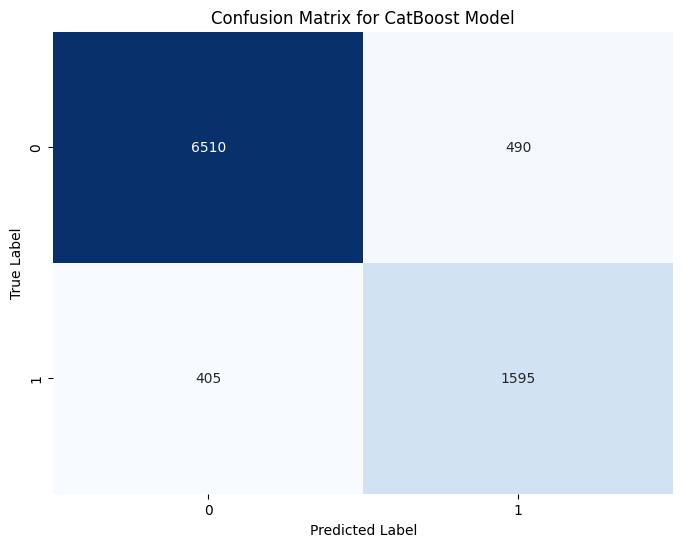

In [35]:
# Provides a comprehensive view of right and wrong judgments by computing a summary table that counts the frequency with which each actual outcome was coupled with each anticipated outcome.
cm = confusion_matrix(loan_y_test, loan_y_test_pred)

# Creates a new visual canvas with a defined width and height to display the summary table in a clear and readable format
mtplt.figure(figsize=(8, 6))
# Displays the summary table as a colorful grid with counts for each real-projected combination. For clarity, numbers are shown inside each cell.
sbrn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# Incorporates a horizontal descriptor to show the category that the prediction framework has allocated.
mtplt.xlabel('Predicted Label')
# To show the actual category seen in the reserved evaluation set, a vertical descriptor is added.
mtplt.ylabel('True Label')
# In order to make it clear that the visualization depicts the effectiveness of the completed predictive system, a descriptive header is placed above the grid.
mtplt.title('Confusion Matrix for CatBoost Model')
# Displays the graphic on the screen for visual interpretation of the distribution of right and wrong choices.
mtplt.show()

ROC Curve

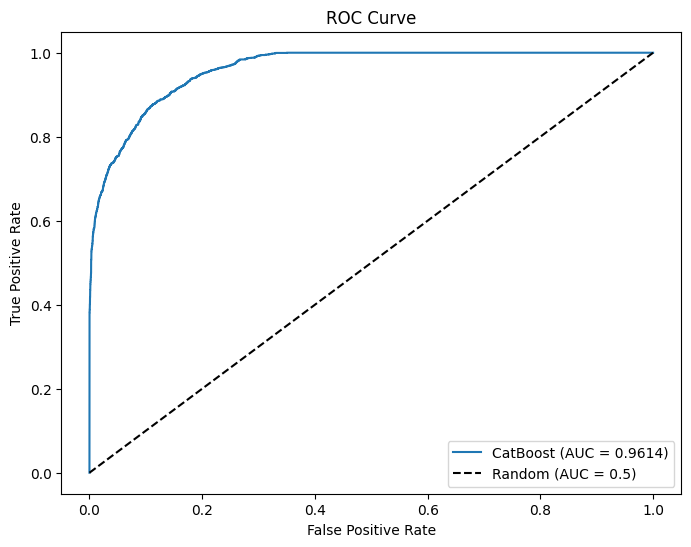

In [36]:
# Determines the rate at which positive cases are accurately identified, the rate at which negative cases are mistakenly classified as positive, and the associated decision thresholds.
fpr, tpr, thresholds = roc_curve(loan_y_test, loan_y_test_pred_proba)
# Summarizes the framework's capacity to differentiate outcomes by computing the total measure of separability between positive and negative situations.
auc = roc_auc_score(loan_y_test, loan_y_test_pred_proba)

# Constructs a new visual canvas with predetermined measurements to show the correlation between error rate and detection performance.
mtplt.figure(figsize=(8, 6))
# Marks the curve with the overall separability score and illustrates the trade-off between successfully recognized positives and wrongly detected negatives.
mtplt.plot(fpr, tpr, label=f'CatBoost (AUC = {auc:.4f})')
# Provides a baseline for comparison by drawing a slanted benchmark line that depicts the anticipated result of a guessing system.
mtplt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
# Explains the lower axis, which displays the proportion of false alarms to all actual bad examples.
mtplt.xlabel('False Positive Rate')
# Explains the side axis, which displays the proportion of accurately identified positives to all instances of true positives.
mtplt.ylabel('True Positive Rate')
# Incorporates a headline that informs the audience that the graphic is about weighing sensitivity against errors.
mtplt.title('ROC Curve')
# Allows the viewer to see the descriptive labels for plotted elements.
mtplt.legend()
# Shows the screen's completed visual output.
mtplt.show()

Precision-Recall Curve

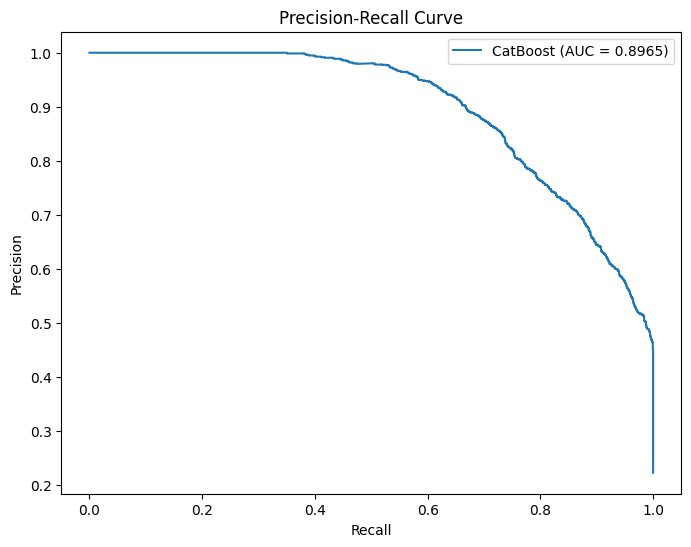

In [38]:
# Establishes the connection between the accuracy of positive findings and the capacity to identify positives.
precision, recall, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba)

# Re-import auc to ensure the function is available, as it might have been overwritten by a variable.
from sklearn.metrics import auc

# Determines the total area covered by the graph that strikes a balance between the correctness of the predictions and the completeness of the positive detection.
pr_auc = auc(recall, precision)

# To prepare the visual output, a new drawing space with specified height and width is created.
mtplt.figure(figsize=(8, 6))
# Provides a label with its summed performance score and illustrates the trade-off between detection completeness and exactness.
mtplt.plot(recall, precision, label=f'CatBoost (AUC = {pr_auc:.4f})')
# Indicates the percentage of real positives that were successfully recorded by adding a description to the lower axis.
mtplt.xlabel('Recall')
# Indicates the percentage of expected positives that were really correct by adding a description to the side axis.
mtplt.ylabel('Precision')
# In order to inform the viewer that the graphic is about striking a balance between forecast correctness and detection thoroughness, a heading is included at the top.
mtplt.title('Precision-Recall Curve')
# Shows the description so the observer can tell the depicted curve apart from other models or references.
mtplt.legend()
# Displays the finished chart for analysis on the screen.
mtplt.show()

# ExtraTrees Model

In [39]:
# Builds a custom function that will be called periodically by the optimization engine to test various combinations of settings.
def objective(trial):
# Assembles a set of movable settings that regulate the behavior of the learning system while it is being built.
    params = {
        # Establishes the number of distinct students that will be merged to create the ultimate decision-making mechanism.
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        # Defines each learner's maximum growth level before it is compelled to cease growing.
        "max_depth": trial.suggest_int("max_depth", 6, 20),
        # Determines the minimum quantity of data necessary for a structural split to occur.
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        # Specifies the bare minimum of observations required to stay at the terminal nodes.
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        # Indicates the number of input attributes that can be analyzed when a division is made inside the structure.
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        # Selects whether sampling with or without repetition is used to create new subgroups.
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        # Fixes randomization to a fixed seed to ensure reproducibility.
        "random_state": 42,
        # Makes training faster by allowing the system to use all of its CPU cores.
        "n_jobs": -1
    }
    # Uses the previously specified hyperparameters to initialize the ensemble learning algorithm.
    model = ExtraTreesClassifier(**params)
    # Uses resampled inputs and matching labels to fit the learning algorithm to the training dataset.
    model.fit(loan_X_train_final, loan_y_train_resampled_ros)
    # Produces predictions for evaluation using the testing dataset that hasn't been seen.
    preds = model.predict(loan_X_test_final)
    # Determines the correctness score by contrasting the true tags with the anticipated results.
    acc = accuracy_score(loan_y_test, preds)
    # Provides the optimization framework with the calculated accuracy score so that performance may be compared.
    return acc

# Develops a search procedure that constantly seeks to enhance the target measurement in an effort to find the best configuration.
study = optuna.create_study(direction="maximize")
# Tests various setups through the evaluation function a predetermined number of times, executing the search routine and providing progress feedback.
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Outputs the precise configuration of movable options that produced the best result throughout the search.
print("Best Parameters:", study.best_params)
# The best level of success discovered during the search attempts is represented by the number score that is printed out.
print("Best Accuracy:", study.best_value)

# Creates a new predictive system based on the best configuration found, guaranteeing repeatable outcomes and optimal computational efficiency.
best_model_et = ExtraTreesClassifier(**study.best_params, random_state=42, n_jobs=-1)
# Fits the completed prediction system to all of the prepared training data so that it can be used or evaluated later.
best_model_et.fit(loan_X_train_final, loan_y_train_resampled_ros)

[I 2025-12-31 10:15:15,824] A new study created in memory with name: no-name-be3b5caa-1b45-4e03-a707-045d802b6815


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-31 10:15:22,327] Trial 0 finished with value: 0.8541111111111112 and parameters: {'n_estimators': 513, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8541111111111112.
[I 2025-12-31 10:15:29,084] Trial 1 finished with value: 0.8304444444444444 and parameters: {'n_estimators': 525, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8541111111111112.
[I 2025-12-31 10:15:41,881] Trial 2 finished with value: 0.8661111111111112 and parameters: {'n_estimators': 660, 'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.8661111111111112.
[I 2025-12-31 10:15:46,922] Trial 3 finished with value: 0.843 and parameters: {'n_estimators': 386, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bo

ExtraTreesClassifier(max_depth=19, max_features=None, min_samples_split=15,
                     n_estimators=352, n_jobs=-1, random_state=42)

Training

In [40]:
# Determines how well the system recalls the training patterns by generating predictions using the same examples that were initially used to teach it.
loan_y_train_pred_et = best_model_et.predict(loan_X_train_final)
# Extracts only the pertinent column after producing continuous likelihood values for each record that indicate the system's level of confidence that an instance belongs to the positive group.
loan_y_train_pred_proba_et = best_model_et.predict_proba(loan_X_train_final)[:, 1]

# Provides a general sense of overall correctness on the training instances by calculating the percentage of accurate responses out of all cases.
train_accuracy_et = accuracy_score(loan_y_train_resampled_ros, loan_y_train_pred_et)
# Assesses the proportion of examples that were truly positive, providing information about the reliability of positive forecasts.
train_precision_et = precision_score(loan_y_train_resampled_ros, loan_y_train_pred_et)
# Assesses the proportion of real positives that were effectively identified, demonstrating the system's capacity to prevent the omission of significant positive cases.
train_recall_et = recall_score(loan_y_train_resampled_ros, loan_y_train_pred_et)
# Provides a more comprehensive view of quality by computing a single metric that strikes a balance between the reliability of positive forecasts and the capacity to identify all positives.
train_f1_et = f1_score(loan_y_train_resampled_ros, loan_y_train_pred_et)

# To distinguish the forthcoming numerical results, which show performance on the training dataset, a header message is printed.
print("\nExtraTrees Training Metrics:")
# For clarity, the value indicating total correctness is displayed, rounded to four decimal places.
print(f"Accuracy: {train_accuracy_et:.4f}")
# For clarity, the value indicating the degree of reliability of the positive predictions is displayed, rounded to four decimal places.
print(f"Precision: {train_precision_et:.4f}")
# For clarity, it shows the number of actual positives that were successfully found, rounded to four decimal places.
print(f"Recall: {train_recall_et:.4f}")
# Shows the combined metric, rounded to four decimal places for clarity, that strikes a balance between the completeness and dependability of positive forecasts.
print(f"F1 Score: {train_f1_et:.4f}")


ExtraTrees Training Metrics:
Accuracy: 0.9790
Precision: 0.9664
Recall: 0.9926
F1 Score: 0.9793


Testing

In [41]:
# Generates expected results for the assessment cases that aren't seen at all, which aids in gauging the system's ability to adapt to novel circumstances.
loan_y_test_pred_et = best_model_et.predict(loan_X_test_final)
# Selects only the pertinent column and generates continuous probability values for each case, which indicate the system's confidence in giving the positive label.
loan_y_test_pred_proba_et = best_model_et.predict_proba(loan_X_test_final)[:, 1]

# Provides a general picture of overall correctness on new data by calculating the percentage of accurate answers over the total evaluation cases.
test_accuracy_et = accuracy_score(loan_y_test, loan_y_test_pred_et)
# Determines the proportion of expected positives that were true, indicating how reliable positive identifications are.
test_precision_et = precision_score(loan_y_test, loan_y_test_pred_et)
# Determines the proportion of real positives that were successfully identified, demonstrating the system's capacity to identify significant cases without overlooking them.
test_recall_et = recall_score(loan_y_test, loan_y_test_pred_et)
# Provides a more comprehensive perspective of quality by computing a single composite measurement that strikes a balance between the ability to capture positive predictions and their reliability.
test_f1_et = f1_score(loan_y_test, loan_y_test_pred_et)

# The following numerical outputs summarize performance on new, unseen samples, as shown by the clear header printed to separate results.
print("\nExtraTrees Testing Metrics:")
# For ease of reading and clarity, the total accuracy value is displayed, rounded to four decimal points.
print(f"Accuracy: {test_accuracy_et:.4f}")
# For ease of reading and clarity, the reliability value of positive forecasts is shown, rounded to four decimal places.
print(f"Precision: {test_precision_et:.4f}")
# For clarity and ease of interpretation, the detection ability for actual positives is displayed, rounded to four decimal places.
print(f"Recall: {test_recall_et:.4f}")
# For clarity and ease of interpretation, the balanced quality measurement that combines recall and precision is displayed, rounded to four decimal places.
print(f"F1 Score: {test_f1_et:.4f}")

# Indicates that a thorough analysis of categorization quality for every category will be provided by printing a clear header.
print("\nExtraTrees Classification Report:")
# Provides a comprehensive summary table with information on performance for each class, including support values, retention, exactness, and f1-scoring.
print(classification_report(loan_y_test, loan_y_test_pred_et))


ExtraTrees Testing Metrics:
Accuracy: 0.8941
Precision: 0.7355
Recall: 0.8175
F1 Score: 0.7743

ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7000
           1       0.74      0.82      0.77      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.87      0.85      9000
weighted avg       0.90      0.89      0.90      9000



Confusion Matrix

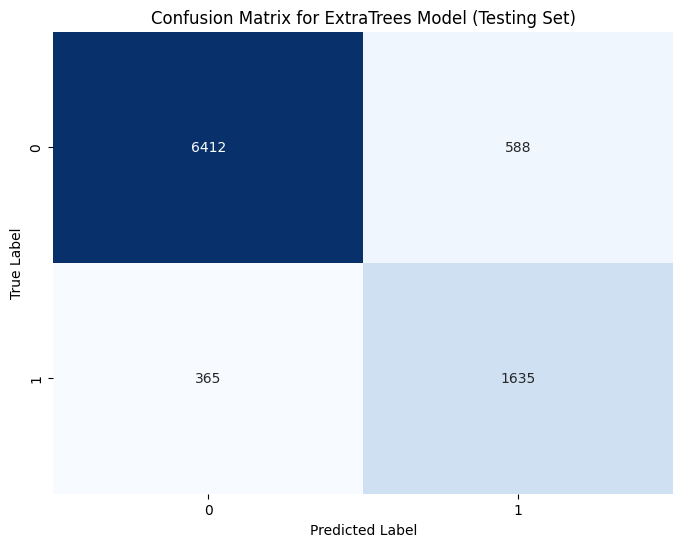

In [42]:
# Creates a two-dimensional summary table that shows the proportion of examples that were correctly identified and those that were misclassified for each result category.
cm_et = confusion_matrix(loan_y_test, loan_y_test_pred_et)

# In order to create a clear and well-sized representation, opens a new blank canvas with specified width and height values.
mtplt.figure(figsize=(8, 6))
# Constructs a color-coded representation of the summary table using a grid, putting precise counts inside each cell and coloring them to highlight errors and accuracy patterns.
sbrn.heatmap(cm_et, annot=True, fmt='d', cmap='Blues', cbar=False)
# In order to let viewers know that the horizontal orientation matches the categories the algorithm anticipated, a descriptive label is placed along the bottom edge.
mtplt.xlabel('Predicted Label')
# In order to let viewers know that the vertical direction matches the real categories found in the assessment data, a descriptive label is placed along the side edge.
mtplt.ylabel('True Label')
# Clearly indicates that the graphic displays classification results for the selected learning method when applied to unseen evaluation instances by adding a heading at the top.
mtplt.title('Confusion Matrix for ExtraTrees Model (Testing Set)')
# Displays the prepared diagram on the screen enabling the audience to visually understand how well the system is working.
mtplt.show()

ROC Curve

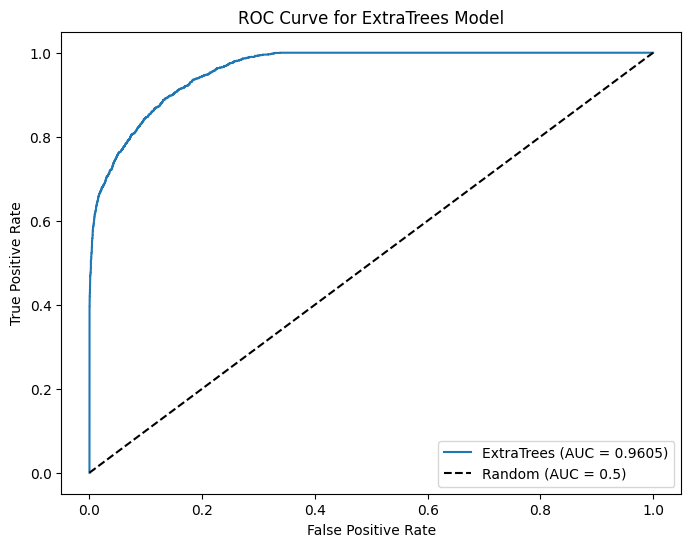

In [43]:
# Uses various cut-off points to calculate the numbers required to trace the curve that contrasts the frequency of false positives with the frequency of correctly detected positives.
fpr_et, tpr_et, thresholds_et = roc_curve(loan_y_test, loan_y_test_pred_proba_et)
# Determines the one number that sums up the total trade-off between sensitivity and false alarms by representing the entire area under the curve.
auc_et = roc_auc_score(loan_y_test, loan_y_test_pred_proba_et)

# To guarantee that the curve is presented properly and at the proper scale, a new blank visualization area with specified dimensions is opened.
mtplt.figure(figsize=(8, 6))
# Attaches a label displaying the summary score and draws the curve that depicts the system's performance across different levels.
mtplt.plot(fpr_et, tpr_et, label=f'ExtraTrees (AUC = {auc_et:.4f})')
# In order to provide a baseline against which the system's performance can be compared, a diagonal reference line representing the result of arbitrary guessing is added.
mtplt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
# Indicates that it shows the percentage of false alarms among negative cases by placing a description on the bottom axis.
mtplt.xlabel('False Positive Rate')
# Puts a description on the side axis to show that it shows the percentage of real positive cases that were accurately classified as positives.
mtplt.ylabel('True Positive Rate')
# Adds a header at the top that makes it clear that the chart shows the trade-off curve for the learning strategy that was selected.
mtplt.title('ROC Curve for ExtraTrees Model')
# Shows the legend so that viewers may quickly discern between the baseline reference line and the system's performance curve.
mtplt.legend()
# Makes the final visualization visible for interpretation and performance evaluation by rendering it.
mtplt.show()

Precision-Recall Curve

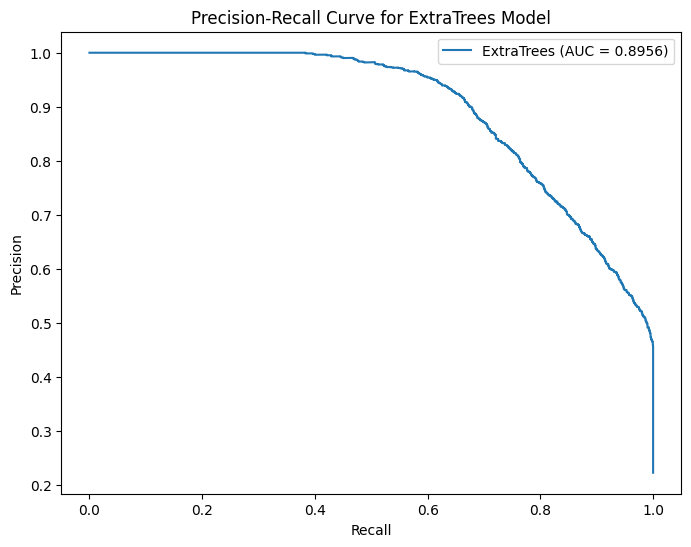

In [44]:
# Produces paired numbers that characterize the ratio of correctly predicted positives to successfully identified true positives across various cut-off points.
precision_et, recall_et, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba_et)

# Determines the precision-recall relationship's area under the curve, yielding a single figure that encapsulates the trade-off between accuracy and completeness.
pr_auc_et = auc(recall_et, precision_et)

# Ensures that the graph is displayed clearly and appropriately sized by opening a new visual area with defined width and height.
mtplt.figure(figsize=(8, 6))
# Adds an inscription with the summed performance score and draws a line that illustrates the trade-off between retention and accurate at different levels.
mtplt.plot(recall_et, precision_et, label=f'ExtraTrees (AUC = {pr_auc_et:.4f})')
# To make it clear that it shows the percentage of real positives that were successfully collected, a description is added along the horizontal axis.
mtplt.xlabel('Recall')
# To make it clear that it shows the percentage of anticipated positives that were accurate, a description is added along the vertical axis.
mtplt.ylabel('Precision')
# Adds a heading at the top that states that the chart shows the trade-off between assuring correctness for the selected learning method and catching positives.
mtplt.title('Precision-Recall Curve for ExtraTrees Model')
# Shows a key to assist visitors in recognizing the arc and comprehending the label that goes with it.
mtplt.legend()
# Displays the finished visualization for the audience to understand how the system strikes a balance between accurate forecasting and detection completeness.
mtplt.show()

# LightGBM Model

In [45]:
# Specifies a function that will be called frequently by the optimization tool, checking various configurations of configurable settings to determine the most efficient setup.
def objective(trial):
  # Generates a tuning dictionary to regulate the gradient-based enhancing algorithm's behavior during training.
    params = {
        # Makes sure the learner is set up for binary outcomes by fixing the problem type as two-class forecasting.
        "objective": "binary",
        # Chooses the enhancing technique, in which students are developed step-by-step to fix the errors of their predecessors.
        "boosting_type": "gbdt",
        # Balances computational cost and performance by deciding how many learners will be built overall.
        "n_estimators": trial.suggest_int("n_estimators", 600, 1200),
        # Using a logarithmic scale to provide precise control over learning speed, it establishes the rate at which the algorithm modifies weights.
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, log=True),
        # Using a logarithmic scale to provide precise control over learning speed, it establishes the rate at which the algorithm modifies weights.
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        # Directly affects the model's capacity to detect subtle patterns by defining the maximum number of terminal nodes per learner.
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        # Helps prevent overly specific splits and regulate generalization by defining the minimum number of samples needed in a leaf node.
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 80),
        # To ensure that results are repeatable across runs, randomization is locked with a consistent seed.
        "random_state": 42,
        # Makes it possible to accelerate training by utilizing all of the machine's CPU cores.
        "n_jobs": -1,
    }
    # Utilizing the selected configuration variables, the booster model is constructed.
    model = lgb.LGBMClassifier(**params)

    # Using an internal error rate metric and an early stopping mechanism to avoid overfitting, the model is trained on the prepared dataset and validated on different data.
    model.fit(
        loan_X_train_final, loan_y_train_resampled_ros,
        eval_set=[(loan_X_test_final, loan_y_test)],
        eval_metric="binary_error",
        callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
    )
    # To test performance, it generates expected results on the evaluation dataset.
    preds = model.predict(loan_X_test_final)
    # Determines the performance metric, which is the percentage of accurate predictions on the evaluation data.
    acc = accuracy_score(loan_y_test, preds)
    # Provides the computed performance for comparison between various setups in the optimization tool.
    return acc

# Launches a hyperparameter search procedure that will experiment with various configurations in an effort to optimize the selected evaluation score.
study = optuna.create_study(direction="maximize")
# Displays a live progress indicator while conducting the search by repeatedly calling the objective function for a predetermined number of trials.
study.optimize(objective, n_trials=40, show_progress_bar=True)

# Outputs the tuning combination that produced the top-performing configuration found during the search.
print("Best Parameters:", study.best_params)
# Out of all the configurations that were tried throughout the search, this prints the highest score obtained.
print("Best Accuracy:", study.best_value)

# Constructs a final boosting model with fixed randomness, full processor utilization, and the optimal settings found.
best_model_lgbm = lgb.LGBMClassifier(**study.best_params, random_state=42, n_jobs=-1)
# Prepares the entire prepared dataset for training the finished enhancing model so that it is ready for deployment or evaluation.
best_model_lgbm.fit(loan_X_train_final, loan_y_train_resampled_ros)

[I 2025-12-31 10:27:47,313] A new study created in memory with name: no-name-d4a5990e-4a7b-45d3-ab7d-788a0c7ad12c


  0%|          | 0/40 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier(learning_rate=0.047266578736129244, max_depth=12,
               min_child_samples=32, n_estimators=1030, n_jobs=-1,
               num_leaves=112, random_state=42)

Training

In [46]:
# Uses the finished enhancing model to generate predicted class labels for the training portion of the dataset.
loan_y_train_pred_lgbm = best_model_lgbm.predict(loan_X_train_final)
# Generates the expected probability of each sample in the training phase falling into the positive class.
loan_y_train_pred_proba_lgbm = best_model_lgbm.predict_proba(loan_X_train_final)[:, 1]

# Determines the percentage of training-phase examples that were correctly classified.
train_accuracy_lgbm = accuracy_score(loan_y_train_resampled_ros, loan_y_train_pred_lgbm)
# Calculates the percentage of training-phase projected positive cases that were indeed accurate.
train_precision_lgbm = precision_score(loan_y_train_resampled_ros, loan_y_train_pred_lgbm)
# Calculates the percentage of real positive cases that were effectively recorded during the training phase.
train_recall_lgbm = recall_score(loan_y_train_resampled_ros, loan_y_train_pred_lgbm)
# Provides evaluation balance by combining sensitivities and correctness into a single score.
train_f1_lgbm = f1_score(loan_y_train_resampled_ros, loan_y_train_pred_lgbm)

# Prints a header to distinguish the assessment results for the training portion's enhancing strategy.
print("\nLightGBM Training Metrics:")
# Shows the percentage of samples that were successfully classified, rounded to four decimal places.
print(f"Accuracy: {train_accuracy_lgbm:.4f}")
# Shows the percentage of anticipated positive cases that were correct, rounded to four decimal places.
print(f"Precision: {train_precision_lgbm:.4f}")
# Shows, rounded to four decimal places, the coverage measure for actual positive cases.
print(f"Recall: {train_recall_lgbm:.4f}")
# Shows, rounded to four decimal places, the balanced score between correctness and sensitivity.
print(f"F1 Score: {train_f1_lgbm:.4f}")


LightGBM Training Metrics:
Accuracy: 0.9969
Precision: 0.9947
Recall: 0.9992
F1 Score: 0.9969


Testing

In [47]:
# Based on the taught learning system, it generates outcome predictions for every entry in the assessment section and assigns them to one of the potential groups.
loan_y_test_pred_lgbm = best_model_lgbm.predict(loan_X_test_final)
# Indicates how strongly the learning system links each example to the positive category by providing probability estimates for each element in the evaluation section.
loan_y_test_pred_proba_lgbm = best_model_lgbm.predict_proba(loan_X_test_final)[:, 1]

# Provides an overall success rate by calculating the percentage of cases in the evaluation section that were allocated to the appropriate outcome category.
test_accuracy_lgbm = accuracy_score(loan_y_test, loan_y_test_pred_lgbm)
# Determines the correctness of positive identifications by calculating the proportion of entries that the system classified as positive that were in fact positive.
test_precision_lgbm = precision_score(loan_y_test, loan_y_test_pred_lgbm)
# Indicates the coverage of real positives by calculating the proportion of actually positive entries that the system was able to identify.
test_recall_lgbm = recall_score(loan_y_test, loan_y_test_pred_lgbm)
# Creates a single balanced metric that combines the preciseness of positive forecasts with the comprehensiveness of capturing positives.
test_f1_lgbm = f1_score(loan_y_test, loan_y_test_pred_lgbm)

# Prints an inscription for each result that explains how the learning system acted on data that was not visible.
print("\nLightGBM Testing Metrics:")
#, formatted with four digits after the decimal point, shows the percentage of total correct predictions for unseen data.
print(f"Accuracy: {test_accuracy_lgbm:.4f}")
# Four digits following the decimal point indicate how accurate the algorithm was at detecting favorable outcomes.
print(f"Precision: {test_precision_lgbm:.4f}")
# Shows the system's capacity to record real positive results, with four digits displayed following the decimal point.
print(f"Recall: {test_recall_lgbm:.4f}")
# Formatted with four digits after the decimal point, it shows the harmonic mean of exactness and retention, which strikes a balance between correctness and completeness.
print(f"F1 Score: {test_f1_lgbm:.4f}")

# Prints a heading stating that a more thorough analysis of the evaluation findings for every category will come next.
print("\nLightGBM Classification Report:")
# Generates and prints a comprehensive table of evaluation metrics for every category, including the number of samples taken into consideration, exactness, retention, and balance score.
print(classification_report(loan_y_test, loan_y_test_pred_lgbm))


LightGBM Testing Metrics:
Accuracy: 0.9049
Precision: 0.7753
Recall: 0.8055
F1 Score: 0.7901

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7000
           1       0.78      0.81      0.79      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.87      0.86      9000
weighted avg       0.91      0.90      0.91      9000



Confusion Matrix

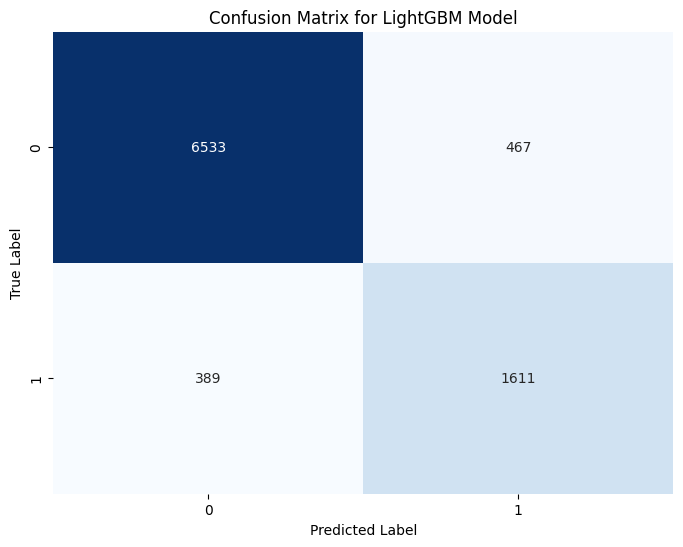

In [48]:
# Provides a comprehensive summary of successes and failures by computing a table that shows the number of instances of each actual category that were allocated to each projected category.
cm_lgbm = confusion_matrix(loan_y_test, loan_y_test_pred_lgbm)

# To facilitate comprehension, a graphical depiction of the summary table is placed inside a visual container of a predetermined size.
mtplt.figure(figsize=(8, 6))
# In order to make patterns of right and wrong decisions readily apparent, it creates a color-coded grid in which each cell displays the number of incidents for a combination of actual and assigned categories.
sbrn.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
# Indicates the category the system anticipated by adding an informative tag along the horizontal axis.
mtplt.xlabel('Predicted Label')
# Indicates each instance's actual category by adding a descriptive name along the vertical axis.
mtplt.ylabel('True Label')
# Adds a title to clarify that this graphic shows the learning system's actual results compared to its expected results.
mtplt.title('Confusion Matrix for LightGBM Model')
# Renders the complete picture so that it can be interpreted and analyzed as a plot.
mtplt.show()

ROC Curve

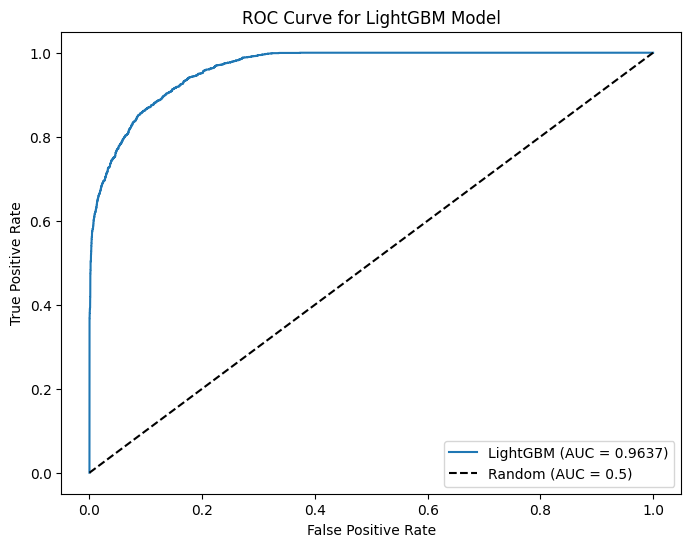

In [49]:
# Determines values to assess the discriminative power of the system by computing the sequence of trade-offs between correctly and wrongly detected positive cases across all potential thresholds.
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(loan_y_test, loan_y_test_pred_proba_lgbm)
# Determines a single numerical summary that measures the system's overall discrimination performance between the two categories; larger values signify better discrimination.
auc_lgbm = roc_auc_score(loan_y_test, loan_y_test_pred_proba_lgbm)

# Creates a visual container of specified dimensions to hold the graphical representation of the trade-off curve for better interpretability.
mtplt.figure(figsize=(8, 6))
# Provides a visual evaluation of system performance by drawing a line that connects the trade-off points and annotating it with the overall summary score.
mtplt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.4f})')
# Provides a baseline for comparison by adding a diagonal reference line that depicts the performance of a random system.
mtplt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
# Indicates that the horizontal axis shows the percentage of negative cases that are incorrectly classified as positive.
mtplt.xlabel('False Positive Rate')
# Indicates that the vertical axis shows the percentage of positive cases that the system correctly identified by labeling it.
mtplt.ylabel('True Positive Rate')
# In order to clarify that this graph illustrates the system's trade-offs between accurate and inaccurate positive identifications, a descriptive title is included.
mtplt.title('ROC Curve for LightGBM Model')
# Clearly identifies each line or arc with its associated meaning by adding an explanation to the depiction.
mtplt.legend()
# In order to interpret system performance across all levels, the graph is rendered for visual inspection.
mtplt.show()

Precision-Recall Curve

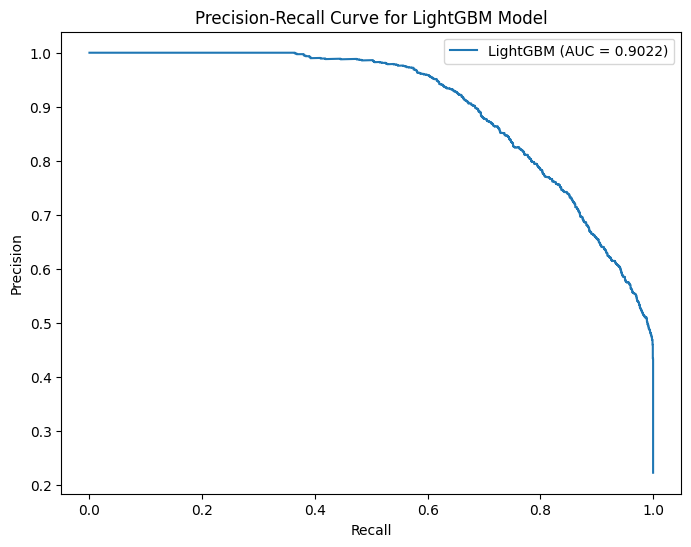

In [50]:
# Shows how well the system strikes a balance between completeness and exactness by generating a set of trade-offs between avoiding false positives and recording all positive cases.
precision_lgbm, recall_lgbm, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba_lgbm)

# Determines a single summary number that indicates the overall quality of the balance between false positives and accurately identified positives; larger values signify better performance.
pr_auc_lgbm = auc(recall_lgbm, precision_lgbm)

# To make the graphical representation of the balance between correctness and completeness easier to understand, a visual container of a predetermined size is created.
mtplt.figure(figsize=(8, 6))
# To enable visual assessment of system quality, a line linking the balance points across all levels is drawn, along with a tag displaying the total summary score.
mtplt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {pr_auc_lgbm:.4f})')
# Indicates that the horizontal axis shows the percentage of all positive instances that the system was able to record.
mtplt.xlabel('Recall')
# Indicates that the vertical axis shows the percentage of cases that are truly correct despite being labeled as positive.
mtplt.ylabel('Precision')
# Adds a headline that clarifies that this graphic illustrates how well the system captures positive cases while preventing false positives.
mtplt.title('Precision-Recall Curve for LightGBM Model')
# To ensure interpretability, a legend is included to clearly distinguish the arc and the summary score that goes with it.
mtplt.legend()
# Renders the graph so that the quality of predictions across all levels may be visually examined.
mtplt.show()

# Feature importance plots

CatBoost Model

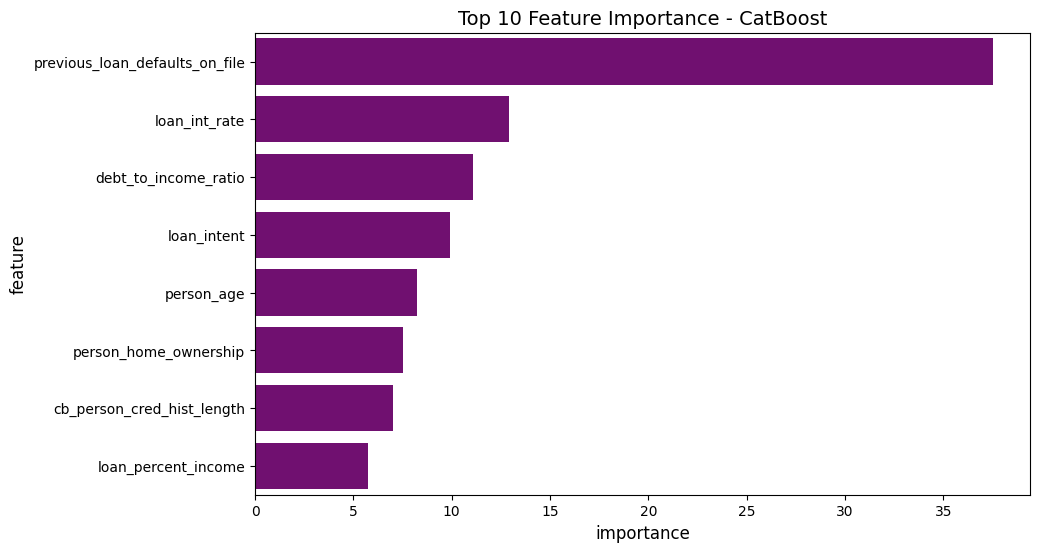

In [51]:
# Retrieves from the trained system the contribution scores of each input attribute, which show the relative effect of each attribute on the predictions.
feature_importances_catboost = best_model_cb.get_feature_importance(prettified=False)

# In order to associate each input attribute with its corresponding contribution score for analysis, # retrieves the names of all input attributes utilized during training.
features_catboost = loan_X_train_final.columns
# To make sorting, filtering, and visualization simpler, the attribute names and their contribution scores are combined into a structured table.
importance_df_catboost = pnds.DataFrame({'feature': features_catboost, 'importance': feature_importances_catboost})

# Highlights the most important elements by sorting the qualities in descending order of influence and choosing only the top ten.
importance_df_catboost = importance_df_catboost.sort_values(by='importance', ascending=False).head(10)

# To display the relative importance of each top attribute, a horizontal bar chart is created in a visual container of a defined size.
mtplt.figure(figsize=(10, 6))
# Using a different color for clarity, the horizontal bars are drawn with the vertical positions corresponding to each attribute and the length representing the influence score.
sbrn.barplot(x='importance', y='feature', data=importance_df_catboost, color='purple')

# To clarify that this graph displays the most important features and their relative influence, it includes an informative tag and axis names with understandable font sizes.
mtplt.title('Top 10 Feature Importance - CatBoost', fontsize=14)
mtplt.xlabel('importance', fontsize=12)
mtplt.ylabel('feature', fontsize=12)
# Provides a visual comparison and interpretation of the chart's most important properties.
mtplt.show()

ExtraTrees Model

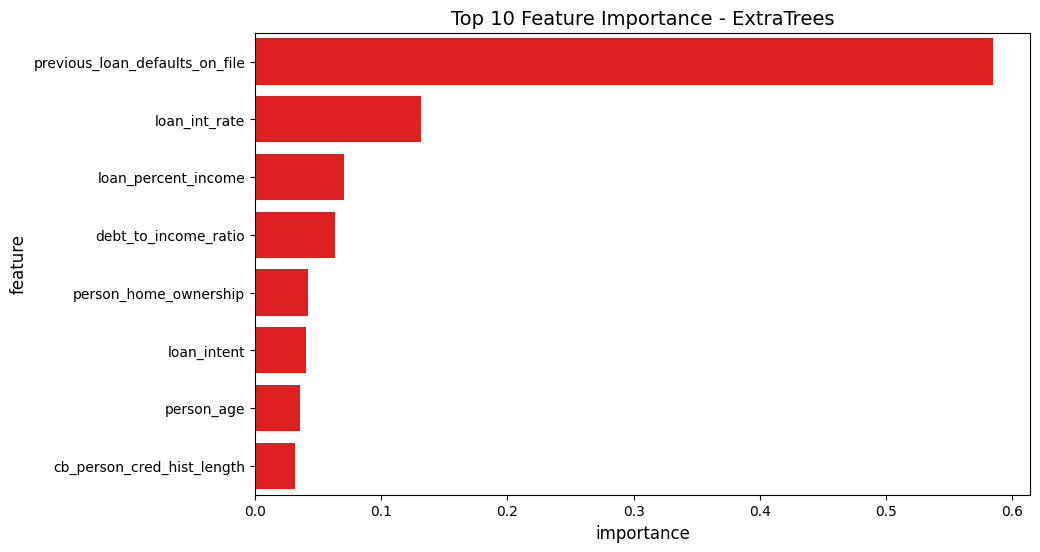

In [52]:
# Shows how much each input characteristic contributes to the output predictions by retrieving its influence score from the finished ensemble model.
feature_importances_et = best_model_et.feature_importances_

# Records all input attribute names used in training so that they can be linked to their corresponding influence scores.
features_et = loan_X_train_final.columns
# Creates a structured table by combining the impact scores and attribute names, which facilitates sorting, filtering, and visualizing the most pertinent inputs.
importance_df_et = pnds.DataFrame({'feature': features_et, 'importance': feature_importances_et})

# Highlights the elements that have the biggest influence on forecasts by sorting the qualities by decreasing contribution and choosing the top ten.
importance_df_et = importance_df_et.sort_values(by='importance', ascending=False).head(10)

# Sets up a visual container of a given size to accommodate a horizontal bar chart that shows the most important features along with their relative importance.
mtplt.figure(figsize=(10, 6))
# Uses a clear and aesthetically pleasing color scheme to draw horizontal bars with lengths that indicate contribution values and placements that correspond to attributes.
sbrn.barplot(x='importance', y='feature', data=importance_df_et, color='red')

# To make it clear that the chart displays the most important input factors and their relative importance, it includes an informative title and axis names with readable font sizes.
mtplt.title('Top 10 Feature Importance - ExtraTrees', fontsize=14)
mtplt.xlabel('importance', fontsize=12)
mtplt.ylabel('feature', fontsize=12)
# Shows the graphic depiction so that each attribute's contribution may be rapidly comprehended and contrasted.
mtplt.show()

LightGBM model

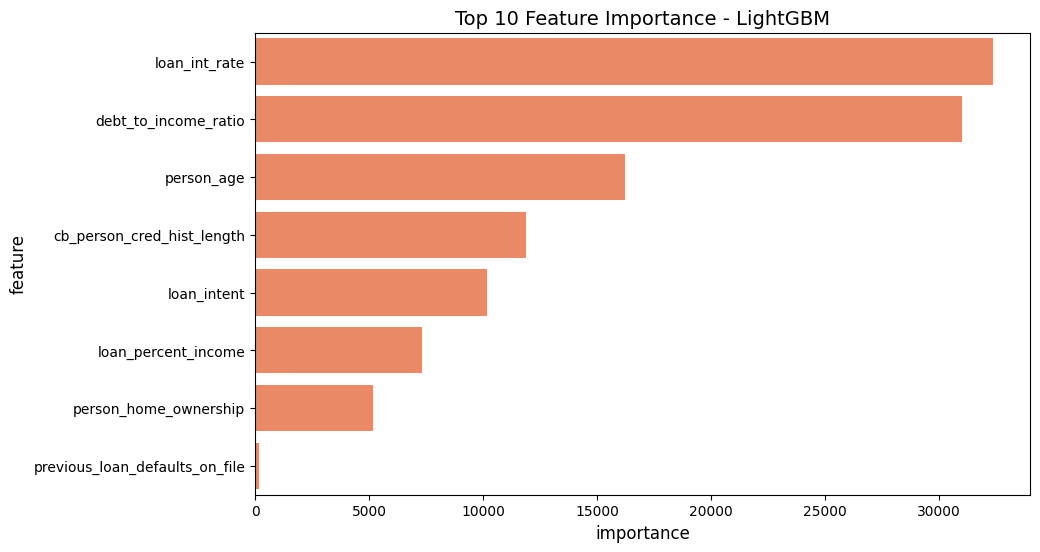

In [53]:
# Shows the strength of each factor's contribution to the overall predictions by retrieving the influence magnitude of each input variable from the trained gradient enhancement model.
feature_importances_lgbm = best_model_lgbm.feature_importances_

# To provide clear representation, all column identifiers from the training data are gathered and linked to the appropriate influence magnitude for each input.
features_lgbm = loan_X_train_final.columns
# Creates a structured table by combining the column identities with their influence values, making it easier to arrange, sort, and get ready for visual inspection.
importance_df_lgbm = pnds.DataFrame({'feature': features_lgbm, 'importance': feature_importances_lgbm})

# To highlight which factors are most important in influencing model decisions, the inputs are arranged by decreasing influence, and the ten most significant variables are chosen.
importance_df_lgbm = importance_df_lgbm.sort_values(by='importance', ascending=False).head(10)

# Clearly illustrates the relative influence of the top input variables by setting up a plotting area of a specified size to hold a horizontal bar chart.
mtplt.figure(figsize=(10, 6))
# Uses a visually striking color to improve readability, and creates a horizontal bar depiction with bar lengths representing contribution magnitudes and placements corresponding to variables.
sbrn.barplot(x='importance', y='feature', data=importance_df_lgbm, color='coral')

# Indicates that the chart emphasizes the most important input factors and their relative influence on decisions by adding a meaningful title and axis labels with readable font sizes.
mtplt.title('Top 10 Feature Importance - LightGBM', fontsize=14)
mtplt.xlabel('importance', fontsize=12)
mtplt.ylabel('feature', fontsize=12)
# To improve interpretability and insight, the chart is rendered on screen, enabling instant visual study of the most important input data.
mtplt.show()

# Comparison graph of all Models

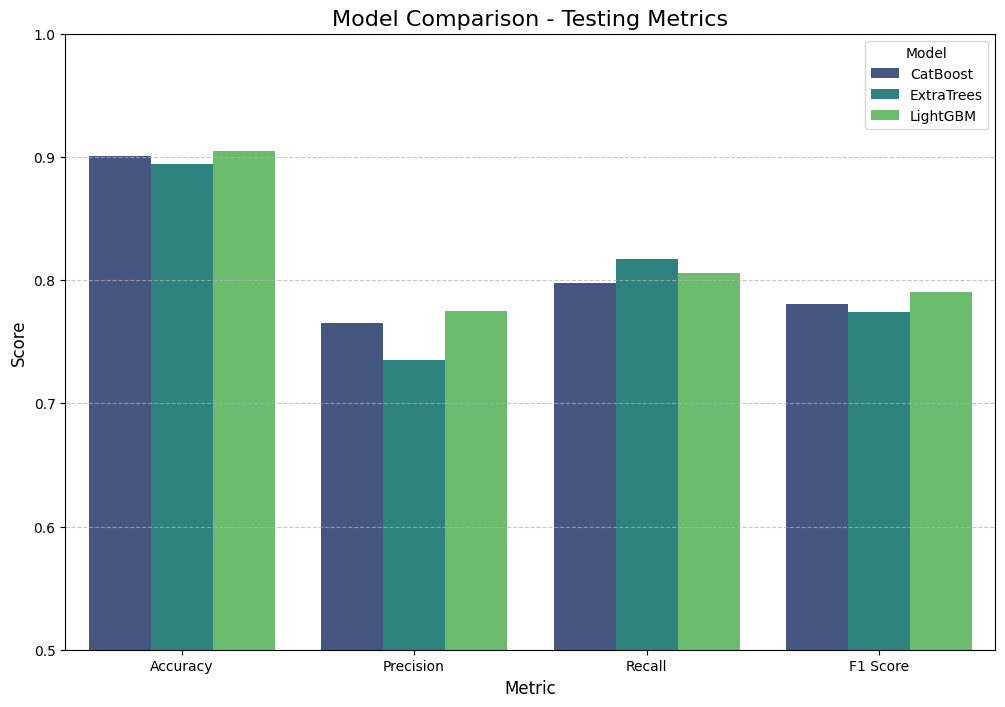

In [54]:
# Creates a structured table that compiles evaluation results from several methods and arranges them according to performance measure type for convenient comparison.
metrics_data = {
    'Model': ['CatBoost', 'ExtraTrees', 'LightGBM'],
    'Accuracy': [test_accuracy, test_accuracy_et, test_accuracy_lgbm],
    'Precision': [test_precision, test_precision_et, test_precision_lgbm],
    'Recall': [test_recall, test_recall_et, test_recall_lgbm],
    'F1 Score': [test_f1, test_f1_et, test_f1_lgbm]
}
metrics_df = pnds.DataFrame(metrics_data)

# In order to create a structure appropriate for graphical representation, # converts the table from wide format to long format. Each row represents a single measure for a single method.
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Ensures readability and clarity by defining a large plotting canvas that may accommodate a comparative depiction of performance measurements across various methodologies.
mtplt.figure(figsize=(12, 8))
# Creates a grouped bar chart with each bar standing for a separate metric for a given strategy, effectively highlighting variances with a visually striking color scheme.
sbrn.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
# Contextualizes the graphic and communicates that it highlights the relative performance of various ways by adding axis names and a clear, informative title.
mtplt.title('Model Comparison - Testing Metrics', fontsize=16)
mtplt.xlabel('Metric', fontsize=12)
mtplt.ylabel('Score', fontsize=12)
# Makes the comparison more meaningful by limiting the vertical scale to a specified range, which improves the visibility of differences.
mtplt.ylim(0.5, 1.0)
# Incorporates modest horizontal lines to make it easier for the eye to follow the data values and provides a legend to indicate which visual aspects belong to the technique.
mtplt.legend(title='Model')
mtplt.grid(axis='y', linestyle='--', alpha=0.7)
# Shows the final comparative visualization so that each technique's performance can be quickly evaluated side by side.
mtplt.show()

# ROC Curve comparison of all models

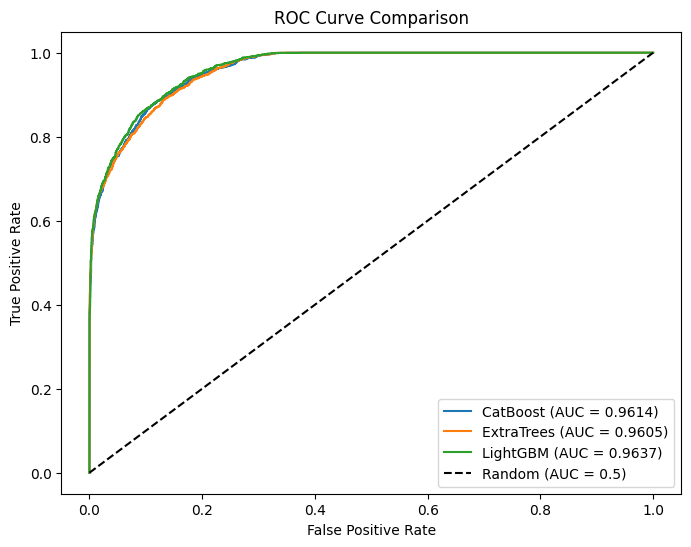

In [55]:
# Calculate the frequency of mistakenly triggered vs correctly detected positive predictions for the first technique, then compute a single numerical summary of its class-separation capabilities.
fpr_cb, tpr_cb, _ = roc_curve(loan_y_test, loan_y_test_pred_proba)
# Calculate the first method's entire efficacy as a single scalar that represents its classification strength.
auc_cb = roc_auc_score(loan_y_test, loan_y_test_pred_proba)

# Using the second technique's anticipated probability, find the same trade-off and total separation ability.
fpr_et, tpr_et, _ = roc_curve(loan_y_test, loan_y_test_pred_proba_et)
# Calculate the second technique's summary performance measure so that it may be directly compared to others.
auc_et = roc_auc_score(loan_y_test, loan_y_test_pred_proba_et)

# Determine the third method's trade-off between accurately predicting positives and over-predicting, while monitoring evaluation levels.
fpr_lgbm, tpr_lgbm, _ = roc_curve(loan_y_test, loan_y_test_pred_proba_lgbm)
# Produce a single numerical assessment of the third method's class discriminating ability.
auc_lgbm = roc_auc_score(loan_y_test, loan_y_test_pred_proba_lgbm)

# To ensure readability and clarity, prepare a visual canvas of a specific size that may hold several overlapping performance lines.
mtplt.figure(figsize=(8, 6))
# Annotate the numerical summary for quick comprehension and draw a line that shows the first approach's efficacy across all decision cutoffs.
mtplt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {auc_cb:.4f})')
# To compare trends with the first method, overlay the performance line of the second strategy with the corresponding summary score.
mtplt.plot(fpr_et, tpr_et, label=f'ExtraTrees (AUC = {auc_et:.4f})')
# Place the effectiveness line for the third strategy on top, making sure that all three can be directly compared in the same visual area.
mtplt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.4f})')

# To offer a baseline reference for assessing the other approaches, provide a diagonal line that represents a truly random assignment.
mtplt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
# To show the percentage of false alarms compared to all negative instances, name the horizontal axis.
mtplt.xlabel('False Positive Rate')
# To show the percentage of correctly detected positive instances compared to all positive instances, name the vertical axis.
mtplt.ylabel('True Positive Rate')
# Give a general explanation of how the visual compares the discriminative power of various methods.
mtplt.title('ROC Curve Comparison')
# Render the visualization for review and show a key that corresponds to each line's corresponding method.
mtplt.legend()
mtplt.show()

# Precision-Recall Curve comparison of all Models

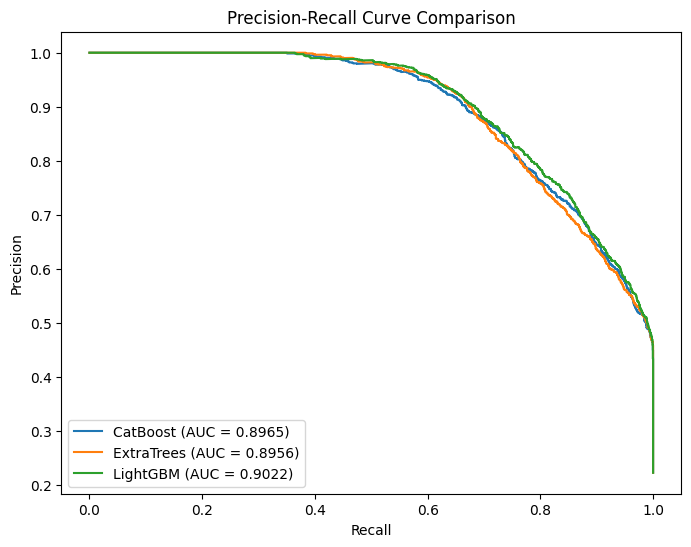

In [56]:
# Find out how well the first method detects positive situations while avoiding a high number of false positives across limits.
precision_cb, recall_cb, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba)
# Calculate a single numerical metric that summarizes the first approach's trade-off between preventing false alarms and accurately identifying positives.
pr_auc_cb = auc(recall_cb, precision_cb)

# Assess how well the second strategy captures positives while reducing overpredictions at different decision points.
precision_et, recall_et, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba_et)
# Create a summary score that shows how well the second strategy handled the trade-off between correctness and completeness overall.
pr_auc_et = auc(recall_et, precision_et)

# Evaluate how well the third method performs in correctly recognizing positive situations while preventing excessive misclassifications.
precision_lgbm, recall_lgbm, _ = precision_recall_curve(loan_y_test, loan_y_test_pred_proba_lgbm)
# Calculate the third approach's overall effectiveness metric so that it can be compared to the other methods.
pr_auc_lgbm = auc(recall_lgbm, precision_lgbm)


# To clearly display several evaluation curves, initialize a visual canvas of the appropriate size.
mtplt.figure(figsize=(8, 6))
# Annotate the overall performance indicator and draw a line that illustrates the trade-off between positive coverage and accurate forecasting in the first technique.
mtplt.plot(recall_cb, precision_cb, label=f'CatBoost (AUC = {pr_auc_cb:.4f})')
# To enable visual comparison with the first way, overlay the arc of the second strategy with its summary metric.
mtplt.plot(recall_et, precision_et, label=f'ExtraTrees (AUC = {pr_auc_et:.4f})')
# In order to ensure that all three approaches can be directly compared in a single figure, overlay the arc from the third approach.
mtplt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {pr_auc_lgbm:.4f})')

# Indicate the percentage of total positives that are accurately recognized at each level by labeling the horizontal axis.
mtplt.xlabel('Recall')
# To display the percentage of accurate predictions among all expected positives, label the vertical axis.
mtplt.ylabel('Precision')
# Give a general explanation of how the graphic contrasts the efficiency of various methods in striking a balance between detection reliability and completeness.
mtplt.title('Precision-Recall Curve Comparison')
# Show the visualization for interpretation and include a key to indicate which line goes with which strategy.
mtplt.legend()
mtplt.show()